In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files

# VEST PA Validation

# VEST Documentation

## Election Results

> Election results from the Pennsylvania Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Cumberland, Elk, Lancaster, Northampton, Susquehanna. The candidate totals for Northampton and Susquehanna differ from the county totals reported by the state and therefore the statewide totals differ from the official results accordingly.

> Allegheny County reported president-only votes countywide. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

## Shapefiles

> Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

## Details about using Voter File

> Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2016 election cycle. While some edits reflect official updates to wards or divisions the great majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries, in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

> In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where significant numbers of numbers were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

> The following revisions were made to the base shapefiles to match the de facto 2016 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are noted at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

## List of Shapefile Revisions

> **Adams:** Adjust Cumberland, Franklin  
**Allegheny:** Merge CD splits for S Fayette 3/5; Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12, Align McCandless with municipal boundary; Adjust Avalon, Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg  
**Armstrong:** Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo  
**Beaver:** Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley  
**Bedford:** Adjust Bedford Boro, Bedford Twp  
**Berks:** Merge CD splits for District, Exeter 5; Split Laureldale 1A/B by CD; Adjust Cumru, Douglass, Oley, Maxatawny, Robeson, Sinking Spring, Spring, Union  
**Blair:** Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp  
**Bucks:** Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill  
**Butler:** Merge CD splits for Cranberry E 2, 3, Cranberry W 1, 2, Jefferson 1, 2; Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople  
**Cambria:** Split Johnstown CT 1/2, W8 1/2, W11/OC, Reade N/S; Realign E Taylor 1/2 into 1-4; Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
**Cameron:** Adjust Emporium, Shippen  
**Clarion:** Split Farmington Central into South/West; Merge Emlenton/Richland  
**Carbon:** Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill  
**Centre:** Merge CD splits for Halfmoon E Central/Proper; Merge Ferguson Northeast 1 A/B; Adjust Benner, College, Ferguson, Patton  
**Chester:** Merge CD/LD splits for Birmingham 2, Phoenixville M 1; Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown  
**Clarion:** Adjust Clarion, Highland, Farmington, Knox  
**Clearfield:** Adjust Bradford, Cooper, Decatur, Golden Rod, Lawrence Glen Richie, Morris, Plympton, Woodward  
**Columbia:** Merge Ashland/Conyngham; Adjust Orange, Scott West  
**Crawford:** Align Mead, Woodcock with municipal boundaries  
**Cumberland:** Merge CD splits for N Middleton 1, 3; Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries  
**Dauphin:** Split Highspire 1/2, Millersburg 1/2, Steelton 2/3, Susquehanna 1/3; Merge Swatara 10 into 6/8; Align Middletown 2-1/3-1 with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown, Swatara  
**Delaware:** Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence  
**Elk:** Split N/S Horton; Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys  
**Erie:** Split Corry 3/4; Merge Mill Creek 23/25; Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East  
**Fayette:** Split Masontown 1/2, Washington 1/2; Align Dunbar with municipal boundary; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone  
**Franklin:** Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington  
**Fulton:** Align McConnellsburg with municipal boundary  
**Greene:** Align Carmichaels with municipal boundary; Adjust Cumberland, Dunkard, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin  
**Huntingdon:** Adjust Huntingdon, Mount Union, Shirley  
**Jefferson:**  Align Reynoldsville with municipal boundary; Adjust Punxsutawney  
**Lackawanna:** Split Olyphant Ward 3-2 A/B; Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop  
**Lancaster:** Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W6, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Boro, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield  
**Lawrence:** Adjust Neshannock  
**Lebanon:** Adjust Jackson, Lickdale, S Lebanon, Union Green Pt  
**Lehigh:** Adjust Lower Macungie, Salisbury  
**Luzerne:** Merge CD splits for Hazle 1; Align Avoca, Pittston with municipal boundaries; Adjust Butler, Dallas Boro, Dallas Twp, Exeter, Foster, Freeland, Hanover, Hazle, Jenkins, Kingston Boro, Kingston Twp, Larksville, Lehman, Nanticoke, Newport, Plains, Salem, Smoyersville, W Wyoming, Wilkes-Barre  
**Lycoming:** Align Williamsport with municipal boundary; Adjust Jersey Shore  
**McKean:** Adjust Bradford City, Bradford Twp, Foster, Keating, Otto  
**Mercer:** Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, S Pymatuning, W Salem  
**Monroe:** Merge CD splits for Smithfield 1; Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield  
**Montgomery:** Merge CD splits for Franconia 2, Horsham 2-1, 4-2, Lower Merion 12-2, 12-3; Add CD splits for Hatfield 5-2, Horsham 2-2, Lower Merion 2-2, Perkiomen 1, Plymouth 2-3; Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence  
**Northampton:** Add CD split for Bethlehem W17; Reverse 2017 Bethlehem Twp redistricting; Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams  
**Northumberland:** Merge CD splits for Upper Mahanoy; Split Riverside A/B; Align Northumberland with municipal boundary; Adjust Coal, Milton, Mount Carmel W, Natalie-Strong, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
**Philadelphia:** Merge 5-30 into 5-10/16/26/27; 5-31 into 5-25; 5-32 into 5-17; 5-33/34 into 5-21; 18-18 into 18-1/9; Adjust 27-7/8, 43-1/24, 51-3/8, 51-4/20, 57-10/27, 62-8/12, 65-4/7  
**Pike:** Adjust Matamoras  
**Potter:** Adjust Galeton, Sharon  
**Schuylkill:** Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville  
**Somerset:** Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro  
**Susquehanna:** Adjust Montrose; Lanesboro, Susquehanna Depot  
**Tioga:** Add CD splits for Shippen; Adjust Delmar, Wellsboro  
**Union:** Adjust Buffalo, White Deer  
**Venango:** Split Cornplanter 1/2; Split Sugarcreek 1/4; Adjust Franklin, Sugarcreek, Cornplanter, Oil City  
**Warren:** Adjust Conewango  
**Washington:** Split Canton 1/3; Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donegal, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, S Strabane, Union Washington, W Brownsville  
**Wayne:** Adjust Honesdale  
**Westmoreland:** Split Ligonier 1/2; Merge CD splits for Unity Pleasant Unity; Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, Murraysville, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood  
**Wyoming:** Split Nicholson Borough; Adjust Falls  
**York:** Merge CD splits for York Twp 5-3; Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15  

## Import File

In [2]:
global vest_pa_16
vest_pa_16 = gp.read_file("./raw-from-source/VEST/pa_2016/pa_2016.shp")

## Election Results

#### Create a FIPS dictionary

In [3]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Pennsylvania"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)
fips_file["unique_ID"] =  "42" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()
pa_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#### Load and clean election results

In [4]:
#Load in election results
pa_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2016/20161108__pa__general__precinct.csv")

#Take a look at the file
print(pa_election.head())

#Filter down to relevant offices
office_list = ['President', 'U.S. Senate', 'Attorney General', 'Auditor General','State Treasurer']
pa_election = pa_election[pa_election["office"].isin(office_list)]

#Change the county column from names to FIPS codes using the above dictionary
pa_election["county"] = pa_election["county"].map(pa_fips_dict).fillna(pa_election["county"])

#Create a pivot column using the FIPS + Precinct Name
pa_election["pivot_col"] = pa_election["county"]+pa_election["precinct"]

#Pivot the election results
pivoted_2016 = pd.pivot_table(pa_election, values=["votes"], index=["pivot_col"],columns=["candidate"],aggfunc=sum)

#Clean up the indices and rename the columns after the pivot
pivoted_2016.reset_index(drop=False,inplace=True)
pivoted_2016.columns = pivoted_2016.columns.droplevel(0)
pivoted_2016.columns=["pivot_col","G16PRECCAS","G16PRERTRU","G16USSLCLI","G16AUDDDEP","G16PRELJOH",
                     "G16PREDCLI","G16TRELBAB","G16PREGSTE","G16AUDRBRO","G16ATGRRAF","G16AUDGSWE",
                     "G16TREDTOR","G16ATGDSHA","G16USSDMCG","G16TREGCOM","G16TRERVOI","G16USSRTOO",
                     "G16AUDLMIN"]

#Using the pivot column, create the name and FIPS columns again
pivoted_2016["NAME"]=pivoted_2016["pivot_col"].str[3:]
pivoted_2016["COUNTYFP"]=pivoted_2016["pivot_col"].str[0:3]

#Filter back down to the needed columns, in the order of how they are in the VEST file
pivoted_2016 = pivoted_2016[["COUNTYFP","NAME",'G16PREDCLI', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO',
       'G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO',
       'G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB',
       'G16TREGCOM']]

  county      precinct     office  district        candidate party  votes
0  Adams   ABBOTTSTOWN  President       NaN  HILLARY CLINTON   DEM    119
1  Adams  ARENDTSVILLE  President       NaN  HILLARY CLINTON   DEM    143
2  Adams  BENDERSVILLE  President       NaN  HILLARY CLINTON   DEM     83
3  Adams       BERWICK  President       NaN  HILLARY CLINTON   DEM    257
4  Adams   BIGLERVILLE  President       NaN  HILLARY CLINTON   DEM    148


#### Deal w/ Allegheny President-Only votes

> "Allegheny County reported president-only votes countywide. These were distributed by candidate to precincts based on their share of the precinct-level reported vote."

In [5]:
#Load the county vote totals in from Open Elections
pa_counties = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2016/20161108__pa__general_county.csv")

#Filter down to Allegheny
pa_counties = pa_counties[(pa_counties["county"]=="Allegheny")&(pa_counties["office"]=="President")]

#Pivot and clean to make useful
pa_counties_piv = pd.pivot_table(pa_counties,index=["county"],values=["votes"],columns="candidate")
pa_counties_piv.columns = pa_counties_piv.columns.droplevel(0)
pa_counties_piv.columns = ['G16PRECCAS','G16PRERTRU', 'G16PRELJOH', 'G16PREDCLI', 'G16PREGSTE']

#Print the difference between the county totals and the precinct totals, these will be the votes to add
for i in ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH','G16PREGSTE', 'G16PRECCAS']:
    print(i +" "+ str(pa_counties_piv[i][0]-sum(pivoted_2016[pivoted_2016["COUNTYFP"]=="003"][i]))+ " votes to add")

G16PREDCLI 683 votes to add
G16PRERTRU 355 votes to add
G16PRELJOH 56 votes to add
G16PREGSTE 6 votes to add
G16PRECCAS 6 votes to add


In [6]:
#Create a dataframe of just Allegheny precincts
allegheny = pivoted_2016[(pivoted_2016["COUNTYFP"]=="003")]

#Remove the Allegheny precincts 
pivoted_2016 = pivoted_2016[(pivoted_2016["COUNTYFP"]!="003")]
pivoted_2016.reset_index(inplace=True,drop=True)

#Get the sums of the precinct-level votes, which will be used as the denominator in the county-wide vote assignment
allegheny_sum = allegheny[['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH','G16PREGSTE', 'G16PRECCAS']].sum()

#Create a dataframe of the total countywide votes that need to be added for each race
allegheny_totals = pd.DataFrame([["G16PREDCLI",683],["G16PRERTRU",355],["G16PRELJOH",56],["G16PREGSTE",6],["G16PRECCAS",6]])
allegheny_totals.set_index(0,inplace=True)

#Make a list of the presidential races that need votes assigned
pres_races = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS']

for race in pres_races:
    #Create two new variables
    add_var = race+"_add"
    rem_var = race+"_rem"
    #Add_var is the number of votes to add based on the percentage of total votes
    allegheny[add_var]=allegheny[race].apply(lambda x:(x/int(allegheny_sum.loc[race]))*int(allegheny_totals.loc[race]))
    #Rem_var is the decimal number of votes of Add_var
    allegheny[rem_var]=allegheny[add_var]%1
    #Because we don't want to assign 
    to_go = int(np.round((sum(allegheny[add_var]))-sum(np.floor(allegheny[add_var])),0))
    for i in allegheny[rem_var].nlargest(to_go).index:
        allegheny.loc[i,add_var]=np.ceil(allegheny.loc[i,add_var])
    allegheny[add_var]=np.floor(allegheny[add_var])
    allegheny[race]+=allegheny[add_var]
    allegheny[race]=allegheny[race].astype(int)
    
allegheny = allegheny[['COUNTYFP', 'NAME', 'G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO', 'G16USSLCLI',
       'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO', 'G16AUDLMIN',
       'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB', 'G16TREGCOM']]

pivoted_2016 = pd.concat([pivoted_2016,allegheny])
pivoted_2016.reset_index(inplace=True,drop=True)

In [7]:
#Re-run the above code to make sure the vote totals now match
pa_counties = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2016/20161108__pa__general_county.csv")
pa_counties = pa_counties[(pa_counties["county"]=="Allegheny")&(pa_counties["office"]=="President")]
pa_counties_piv = pd.pivot_table(pa_counties,index=["county"],values=["votes"],columns="candidate")
pa_counties_piv.columns = pa_counties_piv.columns.droplevel(0)
pa_counties_piv.columns = ['G16PRECCAS','G16PRERTRU', 'G16PRELJOH', 'G16PREDCLI', 'G16PREGSTE']

for i in ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH','G16PREGSTE', 'G16PRECCAS']:
    print(i +" "+ str(pa_counties_piv[i][0]-sum(pivoted_2016[pivoted_2016["COUNTYFP"]=="003"][i]))+ " votes to add")

G16PREDCLI 0 votes to add
G16PRERTRU 0 votes to add
G16PRELJOH 0 votes to add
G16PREGSTE 0 votes to add
G16PRECCAS 0 votes to add


In [8]:
#Print out the totals comparison for the sourcefile vs VEST file

data_columns = ['G16PREDCLI', 'G16PRERTRU','G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO','G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO','G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB','G16TREGCOM']
vote_totals_diff = pd.DataFrame()
for i in data_columns:
    vote_totals_diff= vote_totals_diff.append([[i,int(sum(pivoted_2016[i])),int(sum(vest_pa_16[i])),0,int(sum(pivoted_2016[i])-sum(vest_pa_16[i]))]])
print(vote_totals_diff)
vote_totals_diff.to_csv("./vote_totals_diff.csv")

            0        1        2  3    4
0  G16PREDCLI  2926393  2926444  0  -51
0  G16PRERTRU  2970781  2971198  0 -417
0  G16PRELJOH   146715   146716  0   -1
0  G16PREGSTE    49941    49941  0    0
0  G16PRECCAS    21572    21572  0    0
0  G16USSDMCG  2865009  2865012  0   -3
0  G16USSRTOO  2951706  2951702  0    4
0  G16USSLCLI   235142   235142  0    0
0  G16ATGDSHA  3057013  3057010  0    3
0  G16ATGRRAF  2891322  2891325  0   -3
0  G16AUDDDEP  2958819  2958818  0    1
0  G16AUDRBRO  2667318  2667318  0    0
0  G16AUDLMIN   131853   131853  0    0
0  G16AUDGSWE   158944   158942  0    2
0  G16TREDTOR  2991405  2991404  0    1
0  G16TRERVOI  2610810  2610811  0   -1
0  G16TRELBAB   135132   135132  0    0
0  G16TREGCOM   170276   170275  0    1


In [9]:
#This is for the report, checking totals for certain races in Nor and Sus
diff_to_check = ["G16PREDCLI","G16PRERTRU","G16PRELJOH","G16TRELBAB"]
for i in diff_to_check:
    holder = vest_pa_16.groupby(["COUNTYFP"]).sum()[i]
    print(holder[holder.index.isin(["095","115"])])

COUNTYFP
095    66275
115     5123
Name: G16PREDCLI, dtype: int64
COUNTYFP
095    71736
115    13356
Name: G16PRERTRU, dtype: int64
COUNTYFP
095    3690
115     569
Name: G16PRELJOH, dtype: int64
COUNTYFP
095    2494
115     697
Name: G16TRELBAB, dtype: int64


In [10]:
#Print out the county, by county difference
diff_counties = []

for i in data_columns:
    diff = pivoted_2016.groupby(["COUNTYFP"]).sum()[i]-vest_pa_16.groupby(["COUNTYFP"]).sum()[i]
    print(i)
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    print(diff[diff != 0].to_string(header=False))
    print("")

#Use the FIPS field to print out the name of the different counties
fips_name_dict=dict(zip(fips_file["FIPS County"],fips_file["County Name"]))
for i in diff_counties:
    print(fips_name_dict.get(i))

G16PREDCLI
095    -3
115   -48

G16PRERTRU
115   -417

G16PRELJOH
115   -1

G16PREGSTE
Series([], )

G16PRECCAS
Series([], )

G16USSDMCG
095   -3

G16USSRTOO
095    4

G16USSLCLI
Series([], )

G16ATGDSHA
095    3

G16ATGRRAF
095   -3

G16AUDDDEP
095    1

G16AUDRBRO
Series([], )

G16AUDLMIN
Series([], )

G16AUDGSWE
095    2

G16TREDTOR
095    1

G16TRERVOI
095   -1

G16TRELBAB
Series([], )

G16TREGCOM
095    1

Northampton
Susquehanna


Note: VEST includes Northampton and Susquehanna on it's list of counties where data was corrected with a canvass report, so the fact that there are differences is not surprising. We will see more about the differences when the files are merged and compared precinct-by-precinct.

### Check precinct-by-precinct election totals

In [11]:
#COUNTYFP+"NAME" is a unique ID for the source file
print(pivoted_2016.shape)
pivoted_2016["NAME"] = pivoted_2016["NAME"].str.upper()
print((pivoted_2016["COUNTYFP"]+pivoted_2016["NAME"]).nunique())

# "COUNTYFP" + "NAME" is not a unique ID for the VEST file
print(vest_pa_16.shape)
print((vest_pa_16["COUNTYFP"]+vest_pa_16["NAME"]).nunique())

#Make a field of these variables in the two columns
pivoted_2016["election_check_join"] = pivoted_2016["COUNTYFP"]+pivoted_2016["NAME"]
vest_pa_16["election_check_join"] = vest_pa_16["COUNTYFP"]+vest_pa_16["NAME"]

#Create a list of the duplicate IDs in the VEST file
ser = (vest_pa_16["COUNTYFP"]+vest_pa_16["NAME"]).value_counts()
print(ser[ser>1])
dup_list = list(ser[ser>1].index)

#Create a new variable in VEST that gives a precinct the "Don't join" value if it's duplicated
vest_pa_16["election_check_join_holder"] = vest_pa_16["election_check_join"]
vest_pa_16["election_check_join"] = vest_pa_16["election_check_join"].apply(lambda x: "Don't join" if x in dup_list else x)

#Confirm that it is working correctly
vest_pa_16["election_check_join"].value_counts()

(9123, 20)
9123
(9167, 23)
9118
015WYALUSING               2
009HOPEWELL                2
115NEW MILFORD             2
079NESCOPECK               2
019FAIRVIEW                2
115OAKLAND                 2
123SUGAR GROVE             2
033BURNSIDE                2
111ADDISON                 2
105ULYSSES                 2
083ELDRED                  2
017NEWTOWN DISTRICT 01     2
015TROY                    2
007DARLINGTON              2
107TREMONT                 2
031CLARION DISTRICT 01     2
035BEECH CREEK             2
021GALLITZIN               2
019CONNOQUENESSING         2
079WILKES-BARRE WARD 02    2
037CATAWISSA               2
017NEWTOWN DISTRICT 02     2
015ROME                    2
015MONROE                  2
031CLARION DISTRICT 02     2
015CANTON                  2
053TIONESTA                2
039WOODCOCK                2
117TIOGA                   2
039VENANGO                 2
037BENTON                  2
003BALDWIN DISTRICT 01     2
115THOMPSON                2
003BALDWIN 

Don't join                                   98
003DRAVOSBURG DISTRICT 01                     1
101PHILADELPHIA WARD 09 PRECINCT 05           1
101PHILADELPHIA WARD 02 PRECINCT 14           1
003PITTSBURGH WARD 01 DISTRICT 02             1
                                             ..
091WHITEMARSH DISTRICT MIDDLE DIVISION 04     1
069South Abington District 01 District 01     1
003PLUM DISTRICT 19                           1
095BANGOR WARD 01                             1
097RIVERSIDE PRECINCT B (Cong 11)             1
Name: election_check_join, Length: 9070, dtype: int64

In [12]:
#Check the join on the column (exlcudes the duplicates)
join_one = pd.merge(vest_pa_16,pivoted_2016,how="outer",on="election_check_join",indicator=True)
print(join_one["_merge"].value_counts())

left_only     7469
right_only    7425
both          1698
Name: _merge, dtype: int64


### Increase matches: Find name changes by using vote ID as an identifier and then grabbing name

Note: Here we are using a string composed of the vote totals for the various races as a unique ID. Through experimentation, we found that this had a very high match rate and was much quicker than manually finding the name changes for the ~7500 precincts that need to be matched. We did check the names of the precincts that were matched through the vote ID to make sure it was reasonable.

In [13]:
#Create a unique vote ID column
pivoted_2016["unique_vote_id"] = ""
vest_pa_16["unique_vote_id"] = ""

#Add in the vote totals from all the races to form the unique ID
for i in data_columns:
    pivoted_2016["unique_vote_id"]+=pivoted_2016[i].astype(str)
    vest_pa_16["unique_vote_id"]+=vest_pa_16[i].astype(str)
    
#Since we are doing this to see what names to map to, exlcude the duplicate VEST names
join_vest_pa_16 = vest_pa_16[(vest_pa_16["unique_vote_id"]!="000000000000000000")&~(vest_pa_16["election_check_join"].isin(dup_list))]
join_pivoted_2016 = pivoted_2016[pivoted_2016["unique_vote_id"]!="000000000000000000"]     
    

In [14]:
vote_name_hack = pd.merge(join_vest_pa_16,join_pivoted_2016,how="outer",on="unique_vote_id",indicator=True)
print(vote_name_hack["_merge"].value_counts())
left_only = vote_name_hack[vote_name_hack["_merge"]=="left_only"]
right_only = vote_name_hack[vote_name_hack["_merge"]=="right_only"]

#left_only.to_csv("./election_check_only_vest.csv")
#right_only.to_csv("./election_check_only_source.csv")

both          8968
left_only      196
right_only     141
Name: _merge, dtype: int64


As you can see, this results in ~7400 more joins than using the unedited names. We will make a dictionary of the name changes suggested this way to perform a sanity check

In [15]:
#Using the vote_name_hack, grab the VTDST and the name columns created from the join
changes = vote_name_hack[vote_name_hack["_merge"]=="both"][["VTDST","election_check_join_holder","election_check_join_y"]]

In [16]:
#Create a dictonary that maps from the source file name to the VEST name
source_to_vest_changes_vote_id = dict(zip(changes["election_check_join_y"],changes["election_check_join_holder"]))

#Create and export a df as a sanity check to make sure the names that are being mapped make sense
source_to_vest_changes_vote_id_df = pd.DataFrame()
source_to_vest_changes_vote_id_df["Source_Name"]=source_to_vest_changes_vote_id.keys()
source_to_vest_changes_vote_id_df["VEST_Name"]=source_to_vest_changes_vote_id_df["Source_Name"].apply(lambda x: source_to_vest_changes_vote_id[x])
source_to_vest_changes_vote_id_df.to_csv("./vote_id_name_changes_check.csv")

#Apply the dictionary to the sourcefile names so they match VEST's
pivoted_2016["election_check_join"] = pivoted_2016["election_check_join"].map(source_to_vest_changes_vote_id).fillna(pivoted_2016["election_check_join"])

### Sort out remaining unmatched precincts: Manually identify name changes

In [17]:
#These precincts do not have exactly matching vote totals so were not identified in the above
#BUT, through looking at the names it is clear that these name changes were made
source_to_vest_changes_manual_dict = {'003HAMPTON DISTRICT 2': '003HAMPTON DISTRICT 02', '003BALDWIN DISTRICT 2': '003BALDWIN DISTRICT 02', '003AVALON WARD 1': '003AVALON WARD 01', '003BALDWIN DISTRICT 1': '003BALDWIN DISTRICT 01', '003PENN HILLS WARD 3-4': '003PENN HILLS WARD 03 DISTRICT 04', '095BANGOR WARD 1': '095BANGOR WARD 01', '095BANGOR WARD 2': '095BANGOR WARD 02', '095BANGOR WARD 3': '095BANGOR WARD 03', '095BANGOR WARD 4': '095BANGOR WARD 04', '095BUSHKILL CENTRE': '095BUSHKILL DISTRICT CENTRE', '095BUSHKILL CHERRY HILL': '095BUSHKILL DISTRICT CHERRY HILL', '095EAST ALLEN EAST': '095EAST ALLEN DISTRICT EAST', '095EAST ALLEN WEST': '095EAST ALLEN DISTRICT WEST', '095EASTON WARD 2': '095EASTON WARD 02', '095EASTON WARD 3-3': '095EASTON WARD 03 DISTRICT 03', '095EASTON WARD 3-4': '095EASTON WARD 03 DISTRICT 04', '095EASTON WARD 4': '095EASTON WARD 04', '095EASTON WARD 6': '095EASTON WARD 06', '095EASTON WARD 7': '095EASTON WARD 07', '095EASTON WARD 8-EAST': '095EASTON WARD 08 DISTRICT EAST', '095EASTON WARD 8-WEST': '095EASTON WARD 08 DISTRICT WEST', '095EASTON WARD 10-EAST': '095EASTON WARD 10 DISTRICT EAST', '095FORKS EASTERN 1': '095FORKS DISTRICT EASTERN DISTRICT 01', '095FORKS EASTERN 2': '095FORKS DISTRICT EASTERN DISTRICT 02', '095FORKS WESTERN 2': '095FORKS DISTRICT WESTERN DISTRICT 02', '095HANOVER 1': '095HANOVER DISTRICT 01', '095HANOVER 5': '095HANOVER DISTRICT 05', '095HELLERTOWN WARD 1': '095HELLERTOWN WARD 01', '095BETHLEHEM WARD 1-3': '095BETHLEHEM WARD 01 DISTRICT 03', '095BETHLEHEM WARD 2': '095BETHLEHEM WARD 02', '095BETHLEHEM WARD 2-1': '095BETHLEHEM WARD 02 DISTRICT 01', '095BETHLEHEM WARD 2-2': '095BETHLEHEM WARD 02 DISTRICT 02', '095BETHLEHEM WARD 2-3': '095BETHLEHEM WARD 02 DISTRICT 03', '095BETHLEHEM WARD 3': '095BETHLEHEM WARD 03', '095BETHLEHEM WARD 3-1': '095BETHLEHEM WARD 03 DISTRICT 01', '095BETHLEHEM WARD 3-2': '095BETHLEHEM WARD 03 DISTRICT 02', '095BETHLEHEM WARD 3-4': '095BETHLEHEM WARD 03 DISTRICT 04', '095BETHLEHEM WARD 4': '095BETHLEHEM WARD 04', '095BETHLEHEM WARD 4-1': '095BETHLEHEM WARD 04 DISTRICT 01', '095BETHLEHEM TWP WARD 4-2': '095BETHLEHEM WARD 04 DISTRICT 02', '095BETHLEHEM TWP WARD 4-3': '095BETHLEHEM WARD 04 DISTRICT 03', '095BETHLEHEM WARD 5': '095BETHLEHEM WARD 05', '095BETHLEHEM WARD 6': '095BETHLEHEM WARD 06', '095BETHLEHEM WARD 7': '095BETHLEHEM WARD 07', '095BETHLEHEM WARD 8': '095BETHLEHEM WARD 08', '095BETHLEHEM WARD 9-1': '095BETHLEHEM WARD 09 DISTRICT 01', '095BETHLEHEM WARD 9-2': '095BETHLEHEM WARD 09 DISTRICT 02', '095BETHLEHEM WARD 9-3': '095BETHLEHEM WARD 09 DISTRICT 03', '095BETHLEHEM WARD 14-1': '095BETHLEHEM WARD 14 DISTRICT 01', '095BETHLEHEM WARD 14-2': '095BETHLEHEM WARD 14 DISTRICT 02', '095BETHLEHEM WARD 14-3': '095BETHLEHEM WARD 14 DISTRICT 03', '095BETHLEHEM WARD 14-4': '095BETHLEHEM WARD 14 DISTRICT 04', '095BETHLEHEM WARD 14-5': '095BETHLEHEM WARD 14 DISTRICT 05', '095BETHLEHEM WARD 14-6': '095BETHLEHEM WARD 14 DISTRICT 06', '095BETHLEHEM WARD 14-7': '095BETHLEHEM WARD 14 DISTRICT 07', '095BETHLEHEM WARD 14-8': '095BETHLEHEM WARD 14 DISTRICT 08', '095BETHLEHEM WARD 15-1': '095BETHLEHEM WARD 15 DISTRICT 01', '095BETHLEHEM WARD 15-2': '095BETHLEHEM WARD 15 DISTRICT 02', '095BETHLEHEM WARD 15-3': '095BETHLEHEM WARD 15 DISTRICT 03', '095BETHLEHEM WARD 17 B (CONG 17)': '095BETHLEHEM WARD 17 B (Cong 17)', '095LOWER NAZARETH 1': '095LOWER NAZARETH DISTRICT 01', '095LOWER SAUCON 3': '095LOWER SAUCON DISTRICT 03', '095LOWER SAUCON 5': '095LOWER SAUCON DISTRICT 05', '095MOORE BEERSVILLE': '095MOORE DISTRICT BEERSVILLE', '095NAZARETH WARD 3': '095NAZARETH WARD 03', '095NORTHAMPTON WARD 1': '095NORTHAMPTON WARD 01', '095NORTHAMPTON WARD 2': '095NORTHAMPTON WARD 02', '095NORTHAMPTON WARD 3': '095NORTHAMPTON WARD 03', '095PALMER EASTERN': '095PALMER DISTRICT EASTERN', '095PALMER MIDDLE 2': '095PALMER DISTRICT MIDDLE DIVISION 02', '095PALMER UPPER WESTERN': '095PALMER DISTRICT UPPER WESTERN', '095PALMER WESTERN 1': '095PALMER DISTRICT WESTERN DIVISION 01', '095PALMER WESTERN 2': '095PALMER DISTRICT WESTERN DIVISION 02', '095WILLIAMS MIDDLE': '095WILLIAMS DISTRICT MIDDLE', '017NEWTOWN DISTRICT 1': '017NEWTOWN DISTRICT 01', '017NEWTOWN DISTRICT 2': '017NEWTOWN DISTRICT 02', '079WILKES-BARRE WARD 1': '079WILKES-BARRE WARD 01', '079WILKES-BARRE WARD 2': '079WILKES-BARRE WARD 02', '031CLARION 1': '031CLARION DISTRICT 01', '031CLARION 2': '031CLARION DISTRICT 02', '003MONROEVILLE WARD 1-1': '003MONROEVILLE WARD 01 DISTRICT 01'}
source_to_vest_changes_manual_df = pd.DataFrame()
source_to_vest_changes_manual_df["Source_Name"]=source_to_vest_changes_manual_dict.keys()
source_to_vest_changes_manual_df["VEST_Name"]=source_to_vest_changes_manual_df["Source_Name"].apply(lambda x: source_to_vest_changes_manual_dict[x])
source_to_vest_changes_manual_df.to_csv("./manual_name_changes_check.csv")

In [18]:
pivoted_2016["election_check_join"] = pivoted_2016["election_check_join"].map(source_to_vest_changes_manual_dict).fillna(pivoted_2016["election_check_join"])

### Sort out remaining unmatched precincts: Merge some VEST precincts to match election results

From looking at the unmatched precincts, it is clear that VEST had some precincts that with election results reported at smaller units than the Open Election results. While these election result totals cannot be directly validated, their combined totals can be. These merges account for the duplicate IDs present above.

In [19]:
#Create a new column to assist with the merging
vest_pa_16["dup_consolidation"] = vest_pa_16["election_check_join_holder"]+vest_pa_16["VTDST"].str[3:]

In [20]:
def shape_election_merge(prec_list,new_name):
    global vest_pa_16
    #Merge geometries
    new_geom = vest_pa_16.loc[vest_pa_16["dup_consolidation"].isin(prec_list)].unary_union
    
    #Assign geometries
    ind_val = vest_pa_16.loc[vest_pa_16["dup_consolidation"]==prec_list[0]].index[0]
    vest_pa_16.iat[ind_val,22] = new_geom

    #Change VTDST to "merged"
    vest_pa_16.iat[ind_val,2] = "merged("+prec_list[0][3:]+"-"+prec_list[1][3:]+")"
    vest_pa_16.iat[ind_val,23] = new_name
    
    #Update the columns with votes
    data_columns = ['G16PREDCLI', 'G16PRERTRU','G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO','G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO','G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB','G16TREGCOM']
    for i in data_columns:
        vest_pa_16.loc[vest_pa_16["dup_consolidation"]==prec_list[0],i]+=int(vest_pa_16.loc[vest_pa_16["dup_consolidation"]==prec_list[1],i])
    
    #Remove the second one
    vest_pa_16 = vest_pa_16[vest_pa_16["dup_consolidation"]!=prec_list[1]]
    vest_pa_16.reset_index(inplace=True,drop=True)
    
        

In [21]:
#Duplicates to validate VEST (name+VTDST)
shape_election_merge(["003BALDWIN DISTRICT 01130","003BALDWIN DISTRICT 01151"],"003BALDWIN DISTRICT 01")
shape_election_merge(["003BALDWIN DISTRICT 02140","003BALDWIN DISTRICT 02161"],"003BALDWIN DISTRICT 02")
shape_election_merge(["007DARLINGTON640","007DARLINGTON630"],"007DARLINGTON")
shape_election_merge(["009HOPEWELL150","009HOPEWELL160"],"009HOPEWELL")
shape_election_merge(["009WOODBURY410","009WOODBURY420"],"009WOODBURY")
shape_election_merge(["015CANTON130","015CANTON140"],"015CANTON")
shape_election_merge(["015BURLINGTON120","015BURLINGTON110"],"015BURLINGTON")
shape_election_merge(["015MONROE230","015MONROE220"],"015MONROE")
shape_election_merge(["015ROME300","015ROME310"],"015ROME")
shape_election_merge(["015TROY510","015TROY500"],"015TROY")
shape_election_merge(["015WYALUSING600","015WYALUSING590"],"015WYALUSING")
shape_election_merge(["017NEWTOWN DISTRICT 02860","017NEWTOWN DISTRICT 02920"],"017NEWTOWN DISTRICT 02")
shape_election_merge(["017NEWTOWN DISTRICT 01910","017NEWTOWN DISTRICT 01850"],"017NEWTOWN DISTRICT 01")
shape_election_merge(["019CONNOQUENESSING330","019CONNOQUENESSING340"],"019CONNOQUENESSING")
shape_election_merge(["019FAIRVIEW430","019FAIRVIEW420"],"019FAIRVIEW")
shape_election_merge(["019SLIPPERY ROCK670","019SLIPPERY ROCK680"],"019SLIPPERY ROCK")
shape_election_merge(["021GALLITZIN636","021GALLITZIN615"],"021GALLITZIN")
shape_election_merge(["027HOWARD300","027HOWARD290"],"027HOWARD")
shape_election_merge(["031CLARION DISTRICT 01050","031CLARION DISTRICT 01070"],"031CLARION DISTRICT 01")
shape_election_merge(["031CLARION DISTRICT 02060","031CLARION DISTRICT 02080"],"031CLARION DISTRICT 02")
shape_election_merge(["031KNOX200","031KNOX210"],"031KNOX")
shape_election_merge(["033BURNSIDE110","033BURNSIDE120"],"033BURNSIDE")
shape_election_merge(["035BEECH CREEK040","035BEECH CREEK050"],"035BEECH CREEK")
shape_election_merge(["037BENTON020","037BENTON030"],"037BENTON")
shape_election_merge(["037CATAWISSA260","037CATAWISSA275"],"037CATAWISSA")
shape_election_merge(["039VENANGO570","039VENANGO580"],"039VENANGO")
shape_election_merge(["039WOODCOCK670","039WOODCOCK660"],"039WOODCOCK")
shape_election_merge(["053TIONESTA100","053TIONESTA110"],"053TIONESTA")
shape_election_merge(["079WILKES-BARRE WARD 01635","079WILKES-BARRE WARD 01075"],"079WILKES-BARRE WARD 01")
shape_election_merge(["079WILKES-BARRE WARD 02655","079WILKES-BARRE WARD 02095"],"079WILKES-BARRE WARD 02")
shape_election_merge(["079NESCOPECK740","079NESCOPECK750"],"079NESCOPECK")
shape_election_merge(["079CONYNGHAM180","079CONYNGHAM DISTRICT 01165"],"079CONYNGHAM")
shape_election_merge(["083ELDRED160","083ELDRED170"],"083ELDRED")
shape_election_merge(["099LIVERPOOL130","099LIVERPOOL140"],"099LIVERPOOL")
shape_election_merge(["103MILFORD090","103MILFORD100"],"103MILFORD")
shape_election_merge(["105OSWAYO190","105OSWAYO180"],"105OSWAYO")
shape_election_merge(["105ULYSSES310","105ULYSSES320"],"105ULYSSES")
shape_election_merge(["107TREMONT595","107TREMONT580"],"107TREMONT")
shape_election_merge(["111ADDISON010","111ADDISON020"],"111ADDISON")
shape_election_merge(["113LAPORTE130","113LAPORTE140"],"113LAPORTE")
shape_election_merge(["115GREAT BEND160","115GREAT BEND150"],"115GREAT BEND")
shape_election_merge(["115THOMPSON420","115THOMPSON410"],"115THOMPSON")
shape_election_merge(["115NEW MILFORD320","115NEW MILFORD330"],"115NEW MILFORD")
shape_election_merge(["115OAKLAND340","115OAKLAND350"],"115OAKLAND")
shape_election_merge(["117LIBERTY240","117LIBERTY230"],"117LIBERTY")
shape_election_merge(["117WESTFIELD460","117WESTFIELD445"],"117WESTFIELD")
shape_election_merge(["117TIOGA370","117TIOGA380"],"117TIOGA")
shape_election_merge(["123SUGAR GROVE255","123SUGAR GROVE290"],"123SUGAR GROVE")
shape_election_merge(["131MESHOPPEN130","131MESHOPPEN140"],"131MESHOPPEN")
shape_election_merge(["041LOWER ALLEN PRECINCT 01340","041LOWER ALLEN PRECINCT 01 ANNEX340"],"041LOWER ALLEN PRECINCT 1")
shape_election_merge(["047HORTON TWP N110","047HORTON TWP S110"],"047HORTON")
shape_election_merge(["071LANCASTER WARD 07 PRECINCT 08 (CV)925","071LANCASTER WARD 07 PRECINCT 08 (LS)925"],"071LANCASTER WARD 7-8")
shape_election_merge(["045DARBY TWP WD 03 PCT 01880","045DARBY WD 03 PCT 01970"],"045DARBY WARD 3-1")
shape_election_merge(["045DARBY TWP WD 03 PCT 02890","045DARBY WD 03 PCT 02980"],"045DARBY WARD 3-2")
shape_election_merge(["095BETHLEHEM WARD 01 DISTRICT NORTH065","095BETHLEHEM WARD 01 DISTRICT 01330"],"095BETHLEHEM WARD 1-1")
shape_election_merge(["095BETHLEHEM WARD 01 DISTRICT SOUTH075","095BETHLEHEM WARD 01 DISTRICT 02336"],"095BETHLEHEM WARD 1-2")


### Sort out remaining unmatched precincts: Merge some Open Election precincts to match VEST

In [22]:
data_columns = ['G16PREDCLI', 'G16PRERTRU','G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO','G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO','G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB','G16TREGCOM']

for i in data_columns:
    pivoted_2016.loc[pivoted_2016["election_check_join"]=="095LOWER MT. BETHEL DISTRICT LOWER",i]+=int(pivoted_2016.loc[pivoted_2016["election_check_join"]=="095LOWER MT. BETHEL DISTRICT INDEPENDENT",i])
    
pivoted_2016.loc[pivoted_2016["election_check_join"]=="095LOWER MT. BETHEL DISTRICT LOWER","election_check_join"]="095LOWER MOUNT BETHEL DISTRICT LOWER"
pivoted_2016 = pivoted_2016[pivoted_2016["election_check_join"]!="095LOWER MT. BETHEL DISTRICT INDEPENDENT"]


### Sort out remaining unmatched precincts: Rename two VEST precincts that have the same unique ID

In [23]:
vest_pa_16.loc[vest_pa_16["dup_consolidation"]=="085SANDY LAKE700","election_check_join"]="085SANDY LAKE TWP"
vest_pa_16.loc[vest_pa_16["dup_consolidation"]=="085SANDY LAKE710","election_check_join"]="085SANDY LAKE BORO"

pivoted_2016.loc[pivoted_2016["NAME"]=="SANDY LAKE BORO","election_check_join"]="085SANDY LAKE BORO"
pivoted_2016.loc[pivoted_2016["NAME"]=="SANDY LAKE TWP","election_check_join"]="085SANDY LAKE TWP"

pivoted_2016.reset_index(drop=True,inplace=True)

### Sort out remaining unmatched precincts: Create 3 zero vote precincts that are present in the VEST file

In [24]:
pivoted_2016 = pivoted_2016[pivoted_2016["unique_vote_id"]!="000000000000000000"]

#Add three empty precincts

new_df = pd.DataFrame([["011","ADAMSTOWN",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"011ADAMSTOWN","000000000000000000"],
                       ["049","LAKE ERIE",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"049LAKE ERIE","000000000000000000"],
                      ["091","LOWER MERION WARD 02 DISTRICT 02 B (CD 13)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"091LOWER MERION WARD 02 DISTRICT 02 B (CD 13)","000000000000000000"]]
                      ,columns=pivoted_2016.columns)
pivoted_2016 = pivoted_2016.append(new_df)
pivoted_2016.reset_index(inplace=True,drop=True)

### Join between VEST file and election results

In [25]:

join_one = pd.merge(vest_pa_16,pivoted_2016,how="outer",on="election_check_join",indicator=True)
print(join_one["_merge"].value_counts())



both          9111
left_only        0
right_only       0
Name: _merge, dtype: int64


### Check the election results precinct-by-precinct

Note: From VEST's documentation we expect to see the following:

> Precinct data was corrected with canvass reports for the following counties: Cumberland, Elk, Lancaster, Northampton, Susquehanna. The candidate totals for Northampton and Susquehanna differ from the county totals reported by the state and therefore the statewide totals differ from the official results accordingly.

> Allegheny County reported president-only votes countywide. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

In [26]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                print(i, "{:.>45}".format(df.iloc[j]["election_check_join"]), "(V)","{:.>4}".format(int(df.iloc[j][left_Data]))," (S){:.>4}".format(df.iloc[j][right_Data]),"(D):{:>4}".format(df.iloc[j][right_Data]-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["election_check_join"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["election_check_join"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [27]:
validater_row(join_one[join_one["_merge"]=="both"].sort_values("election_check_join"),data_columns)

G16PRELJOH ............................003AVALON WARD 01 (V) ..31  (S)..30 (D):  -1
G16PRELJOH .......................003BALDWIN DISTRICT 01 (V) ..35  (S)..36 (D):   1
G16PREDCLI .......................003BALDWIN DISTRICT 02 (V) .689  (S).688 (D):  -1
G16PRELJOH .......................003BALDWIN DISTRICT 02 (V) ..32  (S)..33 (D):   1
G16PRECCAS .......................003BALDWIN DISTRICT 02 (V) ...7  (S)...8 (D):   1
G16PRELJOH .......................003HAMPTON DISTRICT 02 (V) ..31  (S)..30 (D):  -1
G16PREDCLI ...........003MONROEVILLE WARD 01 DISTRICT 01 (V) .258  (S).259 (D):   1
G16PRECCAS ............003PENN HILLS WARD 03 DISTRICT 04 (V) ...8  (S)...7 (D):  -1
G16USSDMCG .....................................095ALLEN (V) .994  (S)1004 (D):  10
G16USSRTOO .....................................095ALLEN (V) 1565  (S)1585 (D):  20
G16USSLCLI ............................095BANGOR WARD 01 (V) ..16  (S)..18 (D):   2
G16AUDGSWE ............................095BANGOR WARD 02 (V) ..17  (S)..19 (

G16AUDRBRO .............095BETHLEHEM WARD 14 DISTRICT 07 (V) .461  (S).499 (D):  38
G16TREDTOR .............095BETHLEHEM WARD 14 DISTRICT 07 (V) .544  (S).554 (D):  10
G16TRERVOI .............095BETHLEHEM WARD 14 DISTRICT 07 (V) .427  (S).457 (D):  30
G16PREDCLI .............095BETHLEHEM WARD 14 DISTRICT 08 (V) .422  (S).532 (D): 110
G16PRERTRU .............095BETHLEHEM WARD 14 DISTRICT 08 (V) .298  (S).398 (D): 100
G16ATGRRAF .............095BETHLEHEM WARD 14 DISTRICT 08 (V) .289  (S).389 (D): 100
G16TREDTOR .............095BETHLEHEM WARD 14 DISTRICT 08 (V) .418  (S).468 (D):  50
G16PREDCLI .............095BETHLEHEM WARD 15 DISTRICT 01 (V) .531  (S).421 (D):-110
G16AUDDDEP .............095BETHLEHEM WARD 15 DISTRICT 01 (V) .514  (S).577 (D):  63
G16PREDCLI .............095BETHLEHEM WARD 15 DISTRICT 02 (V) .751  (S).781 (D):  30
G16USSDMCG .............095BETHLEHEM WARD 15 DISTRICT 02 (V) .731  (S)...5 (D):-726
G16TREDTOR .............095BETHLEHEM WARD 15 DISTRICT 02 (V) .735  (S).755 (

G16PREDCLI ..................................115APOLACON (V) ..66  (S)..18 (D): -48
G16PRERTRU ..................................115APOLACON (V) .186  (S)..66 (D):-120
G16PRELJOH ..................................115APOLACON (V) ...9  (S)...8 (D):  -1
G16PRERTRU ....................................115GIBSON (V) .435  (S).535 (D): 100
G16PRERTRU ...............................115NEW MILFORD (V) .895  (S).495 (D):-400
G16PRERTRU ...................................115OAKLAND (V) .297  (S).300 (D):   3

There are  9111  total rows
90  of these rows have election result differences
9021  of these rows are the same

The max difference between any one shared column in a row is:  726
The average difference is:  63.40711462450593
There are  165 precinct results with a difference greater than 10
['003AVALON WARD 01', '003BALDWIN DISTRICT 01', '003BALDWIN DISTRICT 02', '003HAMPTON DISTRICT 02', '003MONROEVILLE WARD 01 DISTRICT 01', '003PENN HILLS WARD 03 DISTRICT 04', '095ALLEN', '095BANGOR WARD 

### Analyze precinct-by-precinct differences

From running the above function, there appear to be differences in three counties: Allegheny, Northampton and Susquehana.

1. Allegheny
    - The differences in Allegheny county are very minor (1 vote each) and appear to be due to small differences in how the countywide presidential votes were distributed. In some of the cases it appears to be a difference in how ties were broken and in others it seems to be a difference in how fractional votes were distributed. Since VEST did not specify their methodology and the differences are just 1 vote in a handful of precincts, this difference does not seem substantial.
    
2. Susquehanna County
    -  VEST mentions that Susquehanna County is one of the counties where the vote totals were corrected via canvass reports. While there are only a handful of precincts with differences in Susquehanna county (4 precincts with differences and 7 total race result differences), the differences are fairly substantial. In looking at the canvass report (http://www.susqco.com/Dept/Voter/Pages/Election-Results.aspx) it appears as though VEST is closer to the official numbers and that their changes are justified.
    
3. Northampton County
    - VEST mentions that Northampton County is one of the counties where the vote totals were corrected via canvass reports. There are a number of precincts with differences and in looking at the canvass report (https://www.northamptoncounty.org/CTYADMN/ELECTNS/Election%20Results/Archives/Nov%208,%202016%20Results%20by%20Precinct.pdf) VEST appears to be correct and their changes justified.
    
NOTE:
- VEST also mentions that precinct data in Cumberland, Elk, and Lancaster counties were corrected via the canvass reports, although from this work there do not appear to be any differences. The most likely explanation for this is that the OpenElections data was updated.

# Join Election Results to a Shapefile

VEST documentation:

> - Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.  
> - The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead.   
> - Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

### Load in Census Redistricting Data Program Phase 2 Files

In [28]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

#Filter down shapefiles to relevant columns
shapefiles_census = shapefiles_census[["COUNTYFP","VTDST","NAME","geometry"]]

#Look into two possible unique IDs
shapefiles_census["cty_pct"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]+shapefiles_census["NAME"]
shapefiles_census["shp_join"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]
print(shapefiles_census.shape)
print(shapefiles_census["shp_join"].nunique())

(9175, 6)
9175


### Look into Delaware County and City of Pittsburgh files

1. Delaware County
    - As noted in the VEST PA 18 report, the Delaware County shapefile does not appear to be available online and we have been unable to get in contact with someone from Delaware County to help locate it.
2. City of Pittsburgh
    - In the VEST PA 18 report, we loaded in the available shapefile from the Allegheny County website (https://openac-alcogis.opendata.arcgis.com/datasets/faaf42d7eaa041cb9fa623ac7b42f475_0?geometry=-81.009%2C40.251%2C-79.031%2C40.617) and found it to be identical to the Census data release. Attempts to get in touch with a GIS official there have also been unsuccessful.

### Perform merges to match what VEST has in its file

Note: These merges were identified through VEST's documentation and by attempting to join the files together

In [29]:
def shape_combiner(prec_list,new_name):
    global shapefiles_census
    #Merge geometries
    new_geom = shapefiles_census.loc[shapefiles_census["shp_join"].isin(prec_list)].unary_union
    
    #Assign geometries
    ind_val = shapefiles_census.loc[shapefiles_census["shp_join"]==prec_list[0]].index[0]

    shapefiles_census.iat[ind_val,3] = new_geom
    #display(vest_pa_16.iat[ind_val,22])
    
        #Change VTDST to "merged"
    shapefiles_census.iat[ind_val,5] = new_name
    
    #Remove the second one
    shapefiles_census = shapefiles_census[shapefiles_census["shp_join"]!=prec_list[1]]
    shapefiles_census.reset_index(inplace=True,drop=True)

In [30]:
shape_combiner(["003000130","003000151"],'003merged(BALDWIN DISTRICT 01130-BALDWIN DISTRICT 01151)')
shape_combiner(["003000140","003000161"],'003merged(BALDWIN DISTRICT 02140-BALDWIN DISTRICT 02161)')
shape_combiner(["00300F409","00300F412"],'00300F408')
shape_combiner(["00300F398","00300F399"],'00300F397')
shape_combiner(['007000640','007000630'],'007merged(DARLINGTON640-DARLINGTON630)')
shape_combiner(['009000150','009000160'],'009merged(HOPEWELL150-HOPEWELL160)')
shape_combiner(['009000410','009000420'],'009merged(WOODBURY410-WOODBURY420)')
shape_combiner(['015000120','015000110'],'015merged(BURLINGTON120-BURLINGTON110)')
shape_combiner(['015000130','015000140'],'015merged(CANTON130-CANTON140)')
shape_combiner(['015000230','015000220'],'015merged(MONROE230-MONROE220)')
shape_combiner(['015000300','015000310'],'015merged(ROME300-ROME310)')
shape_combiner(['015000510','015000500'],'015merged(TROY510-TROY500)')
shape_combiner(['015000600','015000590'],'015merged(WYALUSING600-WYALUSING590)')
shape_combiner(['017001850','017001910'],'017merged(NEWTOWN DISTRICT 01910-NEWTOWN DISTRICT 01850)')
shape_combiner(['017001860','017001920'],'017merged(NEWTOWN DISTRICT 02860-NEWTOWN DISTRICT 02920)')
shape_combiner(['019000330','019000340'],'019merged(CONNOQUENESSING330-CONNOQUENESSING340)')
shape_combiner(['019000430','019000420'],'019merged(FAIRVIEW430-FAIRVIEW420)')
shape_combiner(['019000670','019000680'],'019merged(SLIPPERY ROCK670-SLIPPERY ROCK680)')
shape_combiner(['021000636','021000615'],'021merged(GALLITZIN636-GALLITZIN615)')
shape_combiner(['027000300','027000290'],'027merged(HOWARD300-HOWARD290)')
shape_combiner(['031000070','031000050'],'031merged(CLARION DISTRICT 01050-CLARION DISTRICT 01070)')
shape_combiner(['031000080','031000060'],'031merged(CLARION DISTRICT 02060-CLARION DISTRICT 02080)')
shape_combiner(['031000210','031000200'],'031merged(KNOX200-KNOX210)')
shape_combiner(['033000110','033000120'],'033merged(BURNSIDE110-BURNSIDE120)')
shape_combiner(['035000040','035000050'],'035merged(BEECH CREEK040-BEECH CREEK050)')
shape_combiner(['037000020','037000030'],'037merged(BENTON020-BENTON030)')
shape_combiner(['037000260','037000275'],'037merged(CATAWISSA260-CATAWISSA275)')
shape_combiner(['039000570','039000580'],'039merged(VENANGO570-VENANGO580)')
shape_combiner(['039000660','039000670'],'039merged(WOODCOCK670-WOODCOCK660)')
shape_combiner(['045000880','045000970'],'045merged(DARBY TWP WD 03 PCT 01880-DARBY WD 03 PCT 01970)')
shape_combiner(['045000980','045000890'],'045merged(DARBY TWP WD 03 PCT 02890-DARBY WD 03 PCT 02980)')
shape_combiner(['053000100','053000110'],'053merged(TIONESTA100-TIONESTA110)')
shape_combiner(['079000180','079000165'],'079merged(CONYNGHAM180-CONYNGHAM DISTRICT 01165)')
shape_combiner(['079001740','079001750'],'079merged(NESCOPECK740-NESCOPECK750)')
shape_combiner(['079002635','079003075'],'079merged(WILKES-BARRE WARD 01635-WILKES-BARRE WARD 01075)')
shape_combiner(['079002655','079003095'],'079merged(WILKES-BARRE WARD 02655-WILKES-BARRE WARD 02095)')
shape_combiner(['083000160','083000170'],'083merged(ELDRED160-ELDRED170)')
shape_combiner(['099000130','099000140'],'099merged(LIVERPOOL130-LIVERPOOL140)')
shape_combiner(['103000090','103000100'],'103merged(MILFORD090-MILFORD100)')
shape_combiner(['105000190','105000180'],'105merged(OSWAYO190-OSWAYO180)')
shape_combiner(['105000310','105000320'],'105merged(ULYSSES310-ULYSSES320)')
shape_combiner(['107001595','107001580'],'107merged(TREMONT595-TREMONT580)')
shape_combiner(['111000010','111000020'],'111merged(ADDISON010-ADDISON020)')
shape_combiner(['113000130','113000140'],'113merged(LAPORTE130-LAPORTE140)')
shape_combiner(['115000160','115000150'],'115merged(GREAT BEND160-GREAT BEND150)')
shape_combiner(['115000320','115000330'],'115merged(NEW MILFORD320-NEW MILFORD330)')
shape_combiner(['115000340','115000350'],'115merged(OAKLAND340-OAKLAND350)')
shape_combiner(['115000420','115000410'],'115merged(THOMPSON420-THOMPSON410)')
shape_combiner(['117000240','117000230'],'117merged(LIBERTY240-LIBERTY230)')
shape_combiner(['117000370','117000380'],'117merged(TIOGA370-TIOGA380)')
shape_combiner(['117000460','117000445'],'117merged(WESTFIELD460-WESTFIELD445)')
shape_combiner(['123000255','123000290'],'123merged(SUGAR GROVE255-SUGAR GROVE290)')
shape_combiner(['131000130','131000140'],'131merged(MESHOPPEN130-MESHOPPEN140)')
shape_combiner(['011000301','011000299'],'011000300')
shape_combiner(['011000391','011000393'],'011000390')
shape_combiner(['019000353','019000354'],'019000355')
shape_combiner(['019000359','019000358'],'019000357')
shape_combiner(['019000362','019000363'],'019000361')
shape_combiner(['019000366','019000367'],'019000365')
shape_combiner(['019000546','019000547'],'019000545')
shape_combiner(['019000556','019000557'],'019000555')
shape_combiner(['027000212','027000214'],'027000210')
shape_combiner(['027000264','027000265'],'027000268')
shape_combiner(['027000261','027000263'],'027000262')
shape_combiner(['029000917','029000919'],'029000915')
shape_combiner(['041000601','041000602'],'041000600')
shape_combiner(['041000621','041000622'],'041000620')
shape_combiner(['079000806','079000807'],'079000805')
shape_combiner(['089000251','089000253'],'089000252')
shape_combiner(['091000915','091000918'],'091000917')
shape_combiner(['091001091','091001092'],'091001090')
shape_combiner(['091001143','091001144'],'091001142')
shape_combiner(['091001731','091001732'],'091001730')
shape_combiner(['091001742','091001741'],'091001740')
shape_combiner(['097000872','097000871'],'097000870')
shape_combiner(['129002851','129002852'],'129002850')
shape_combiner(['133001428','133001427'],'133001429')

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. 


### Adjust precinct numbers to match the voter file

From VEST's documentation:

> Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

Note: Although we did not have the voter file, we were able to manually inspect VEST's file to infer the changes they made.

#### Allegheny (Elizabeth, Pittsburgh W12)

<AxesSubplot:>

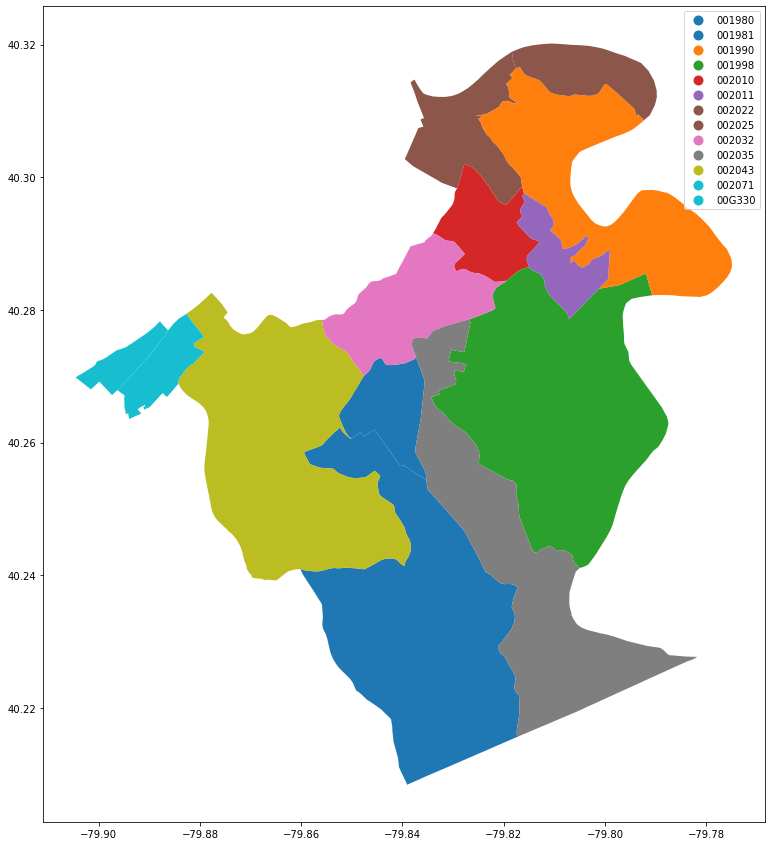

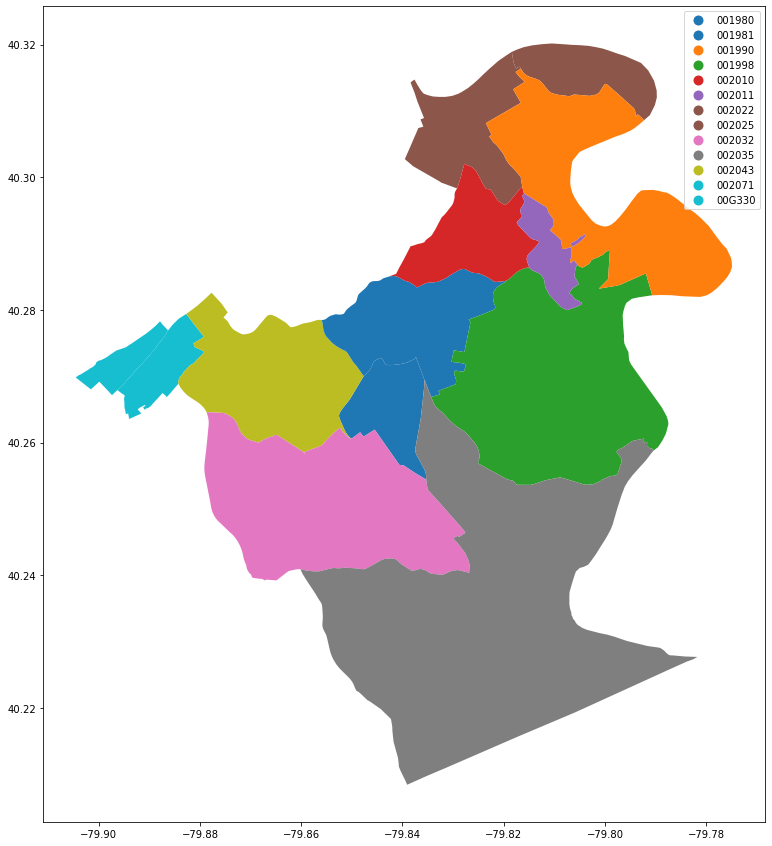

In [31]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("ELIZABETH"))&(shapefiles_census["COUNTYFP"]=="003")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("ELIZABETH"))&(vest_pa_16["COUNTYFP"]=="003")].plot(column="VTDST",legend=True,figsize=(15,15))

In [32]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("ELIZABETH"))&(shapefiles_census["COUNTYFP"]=="003")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("ELIZABETH"))&(vest_pa_16["COUNTYFP"]=="003")])

     COUNTYFP   VTDST                           NAME  \
220       003  002022  ELIZABETH WARD 05 DISTRICT 01   
226       003  002010  ELIZABETH WARD 04 DISTRICT 01   
232       003  001998              ELIZABETH WARD 03   
234       003  001980  ELIZABETH WARD 01 DISTRICT 01   
235       003  001981  ELIZABETH WARD 01 DISTRICT 02   
236       003  001990              ELIZABETH WARD 02   
237       003  002011  ELIZABETH WARD 04 DISTRICT 02   
238       003  002025  ELIZABETH WARD 05 DISTRICT 02   
239       003  002032  ELIZABETH WARD 06 DISTRICT 01   
240       003  002035  ELIZABETH WARD 06 DISTRICT 02   
241       003  002043              ELIZABETH WARD 07   
242       003  002071                      ELIZABETH   
1286      003  00G330                 WEST ELIZABETH   

                                               geometry  \
220   POLYGON Z ((-79.83899 40.30368 0.00000, -79.83...   
226   POLYGON Z ((-79.83396 40.29158 0.00000, -79.83...   
232   POLYGON Z ((-79.83412 40.26691 0

<AxesSubplot:>

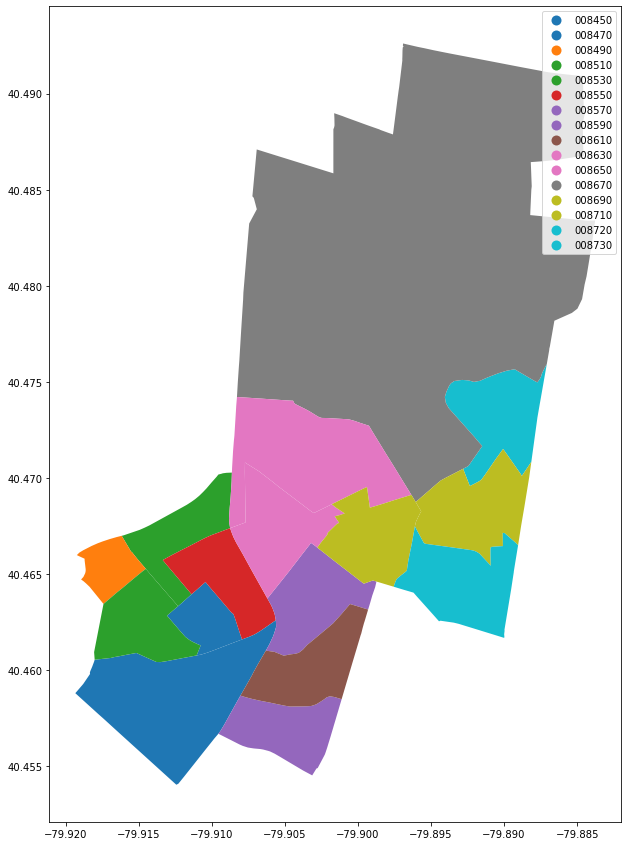

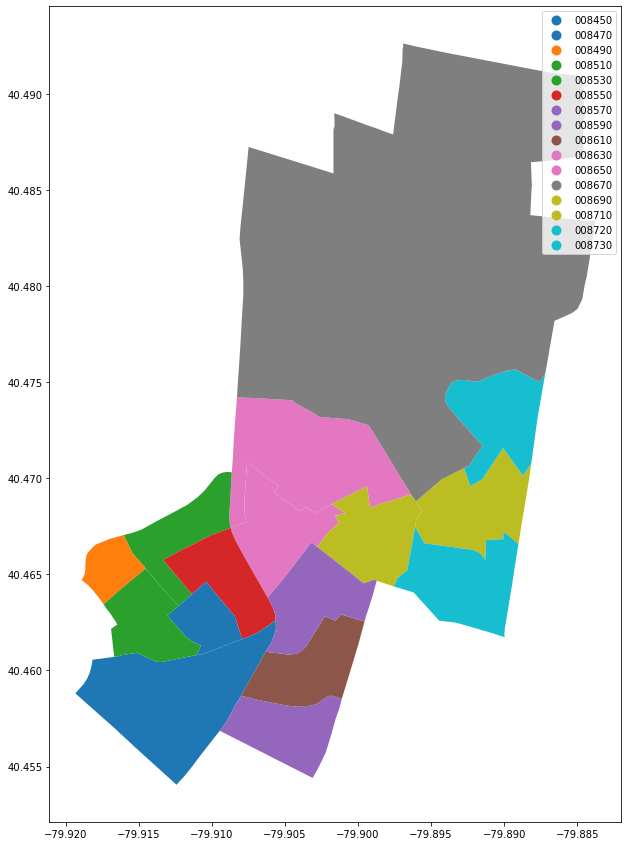

In [33]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("PITTSBURGH WARD 12"))&(shapefiles_census["COUNTYFP"]=="003")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("PITTSBURGH WARD 12"))&(vest_pa_16["COUNTYFP"]=="003")].plot(column="VTDST",legend=True,figsize=(15,15))

In [34]:
print(shapefiles_census[(shapefiles_census["VTDST"].str.contains("PITTSBURGH WARD 12"))&(shapefiles_census["COUNTYFP"]=="003")])
print(vest_pa_16[(vest_pa_16["VTDST"].str.contains("PITTSBURGH WARD 12"))&(vest_pa_16["COUNTYFP"]=="003")])

Empty GeoDataFrame
Columns: [COUNTYFP, VTDST, NAME, geometry, cty_pct, shp_join]
Index: []
Empty GeoDataFrame
Columns: [STATEFP, COUNTYFP, VTDST, NAME, G16PREDCLI, G16PRERTRU, G16PRELJOH, G16PREGSTE, G16PRECCAS, G16USSDMCG, G16USSRTOO, G16USSLCLI, G16ATGDSHA, G16ATGRRAF, G16AUDDDEP, G16AUDRBRO, G16AUDLMIN, G16AUDGSWE, G16TREDTOR, G16TRERVOI, G16TRELBAB, G16TREGCOM, geometry, election_check_join, election_check_join_holder, unique_vote_id, dup_consolidation]
Index: []

[0 rows x 27 columns]


#### Blair (Greenfield)

<AxesSubplot:>

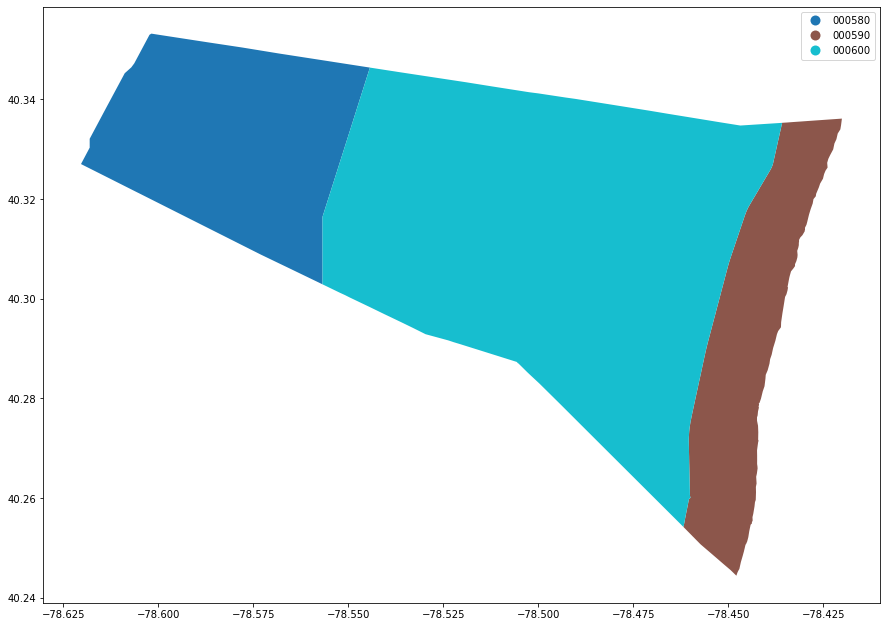

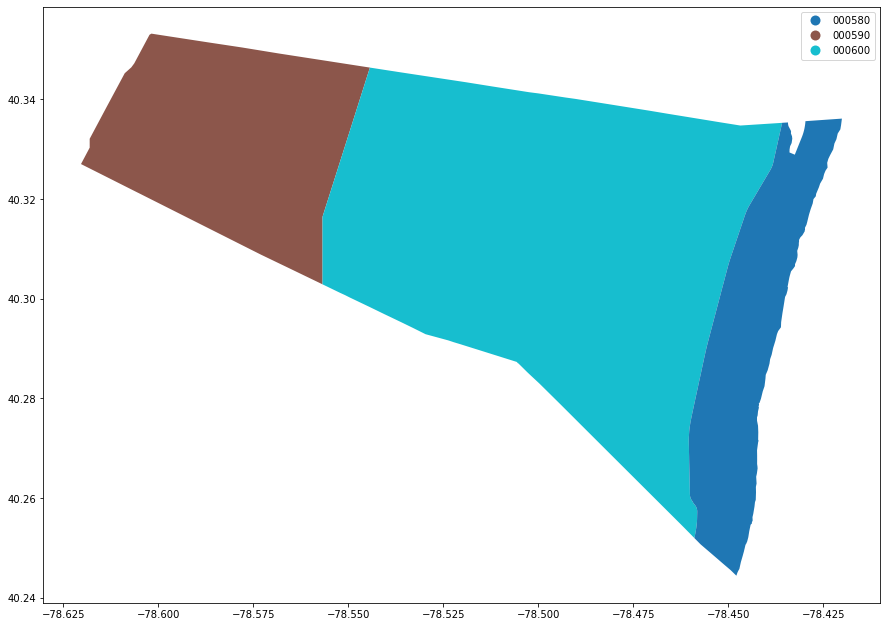

In [35]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("GREENFIELD"))&(shapefiles_census["COUNTYFP"]=="013")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("GREENFIELD"))&(vest_pa_16["COUNTYFP"]=="013")].plot(column="VTDST",legend=True,figsize=(15,15))

In [36]:
#print(shapefiles_census[(shapefiles_census["NAME"].str.contains("GREENFIELD"))&(shapefiles_census["COUNTYFP"]=="013")])
#print(vest_pa_16[(vest_pa_16["NAME"].str.contains("GREENFIELD"))&(vest_pa_16["COUNTYFP"]=="013")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="013") & (shapefiles_census["VTDST"]=="000580"),"shp_join"] = "013000590"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="013") & (shapefiles_census["VTDST"]=="000590"),"shp_join"] = "013000580"

#### Bradford (Athens)

<AxesSubplot:>

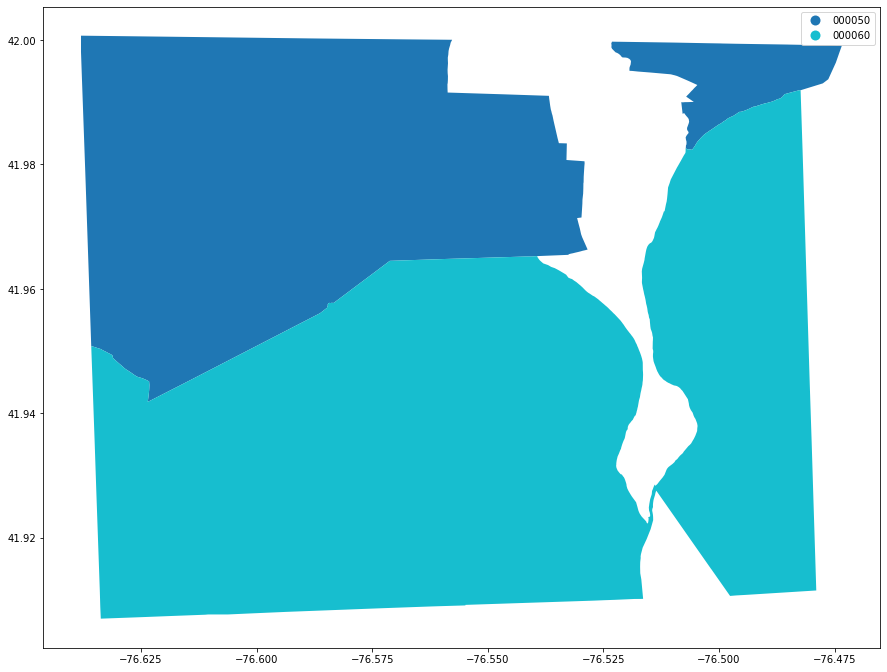

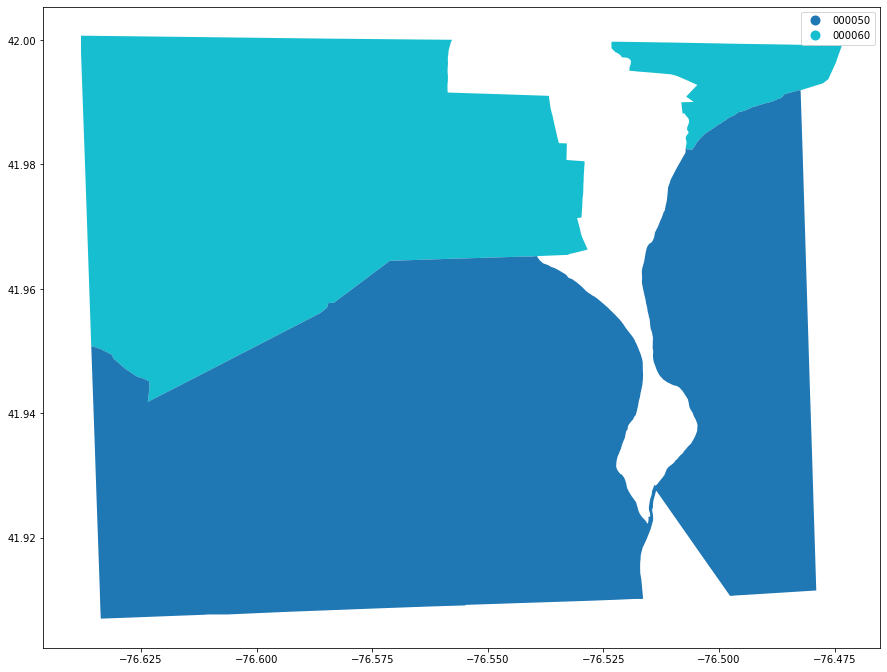

In [37]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("ATHENS DISTRICT"))&(shapefiles_census["COUNTYFP"]=="015")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("ATHENS DISTRICT"))&(vest_pa_16["COUNTYFP"]=="015")].plot(column="VTDST",legend=True,figsize=(15,15))

In [38]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("ATHENS DISTRICT"))&(shapefiles_census["COUNTYFP"]=="015")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("ATHENS DISTRICT"))&(vest_pa_16["COUNTYFP"]=="015")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="015") & (shapefiles_census["VTDST"]=="000050"),"shp_join"] = "015000060"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="015") & (shapefiles_census["VTDST"]=="000060"),"shp_join"] = "015000050"

     COUNTYFP   VTDST                NAME  \
1905      015  000050  ATHENS DISTRICT 01   
1909      015  000060  ATHENS DISTRICT 02   

                                               geometry  \
1905  MULTIPOLYGON Z (((-76.52329 41.99946 0.00000, ...   
1909  POLYGON Z ((-76.63577 41.95079 0.00000, -76.63...   

                          cty_pct   shp_join  
1905  015000050ATHENS DISTRICT 01  015000050  
1909  015000060ATHENS DISTRICT 02  015000060  
     STATEFP COUNTYFP   VTDST                NAME  G16PREDCLI  G16PRERTRU  \
9066      42      015  000060  ATHENS DISTRICT 02         436         752   
9067      42      015  000050  ATHENS DISTRICT 01         255         581   

      G16PRELJOH  G16PREGSTE  G16PRECCAS  G16USSDMCG  ...  G16AUDGSWE  \
9066          38           6          10         442  ...          41   
9067          26           4           6         269  ...          32   

      G16TREDTOR  G16TRERVOI  G16TRELBAB  G16TREGCOM  \
9066         442         697         

#### Greene (Monongahela)

<AxesSubplot:>

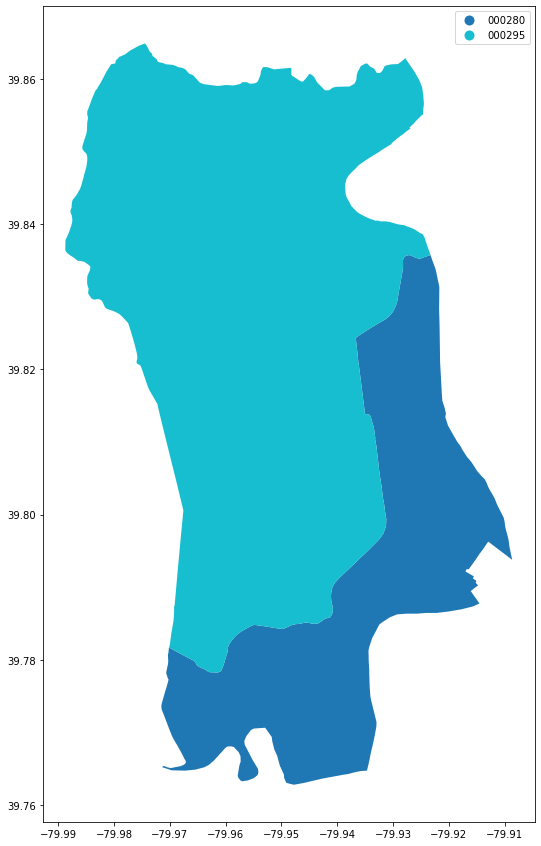

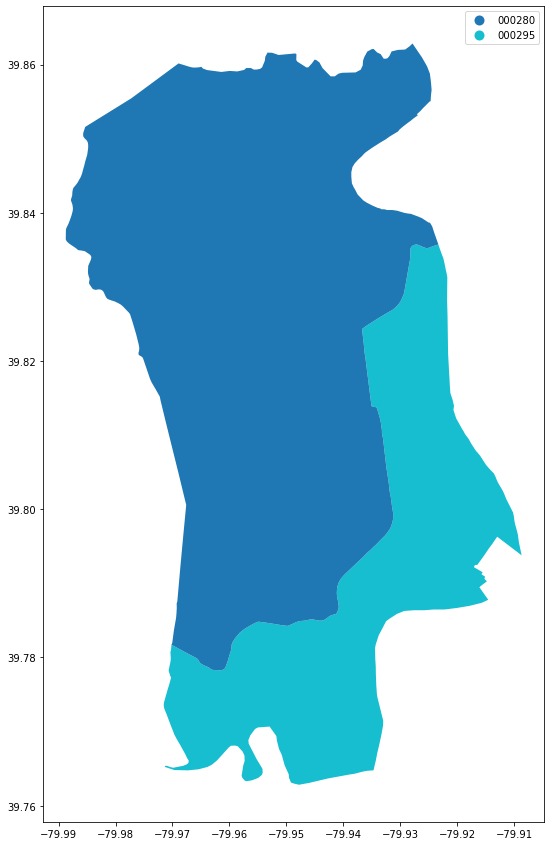

In [39]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("MONONGAHELA"))&(shapefiles_census["COUNTYFP"]=="059")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("MONONGAHELA"))&(vest_pa_16["COUNTYFP"]=="059")].plot(column="VTDST",legend=True,figsize=(15,15))

In [40]:
#print(shapefiles_census[(shapefiles_census["NAME"].str.contains("MONONGAHELA"))&(shapefiles_census["COUNTYFP"]=="059")])
#print(vest_pa_16[(vest_pa_16["NAME"].str.contains("MONONGAHELA"))&(vest_pa_16["COUNTYFP"]=="059")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="059") & (shapefiles_census["VTDST"]=="000280"),"shp_join"] = "059000295"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="059") & (shapefiles_census["VTDST"]=="000295"),"shp_join"] = "059000280"

#### Monroe (Smithfield)

<AxesSubplot:>

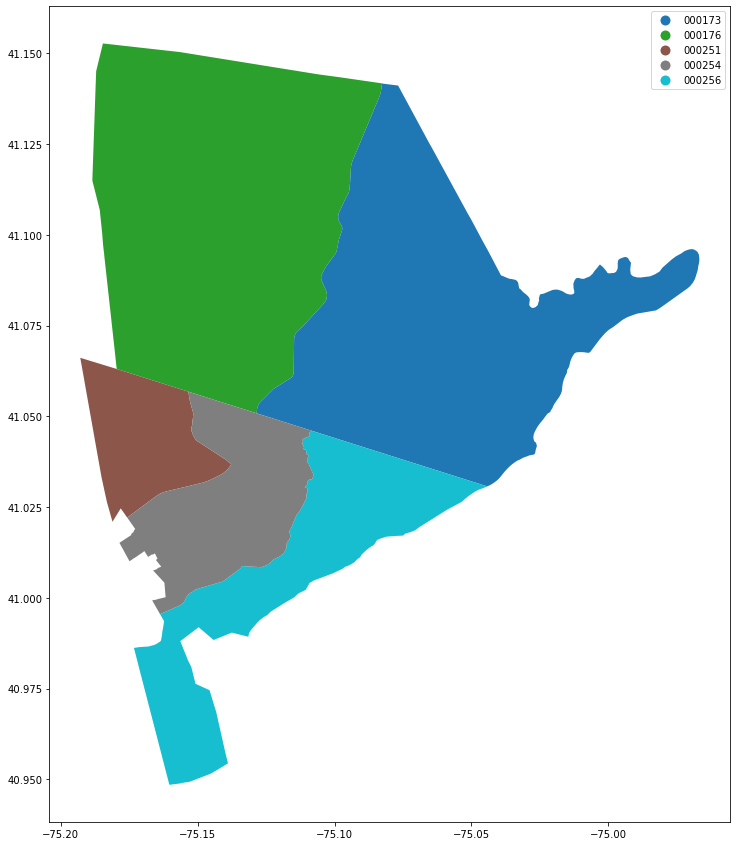

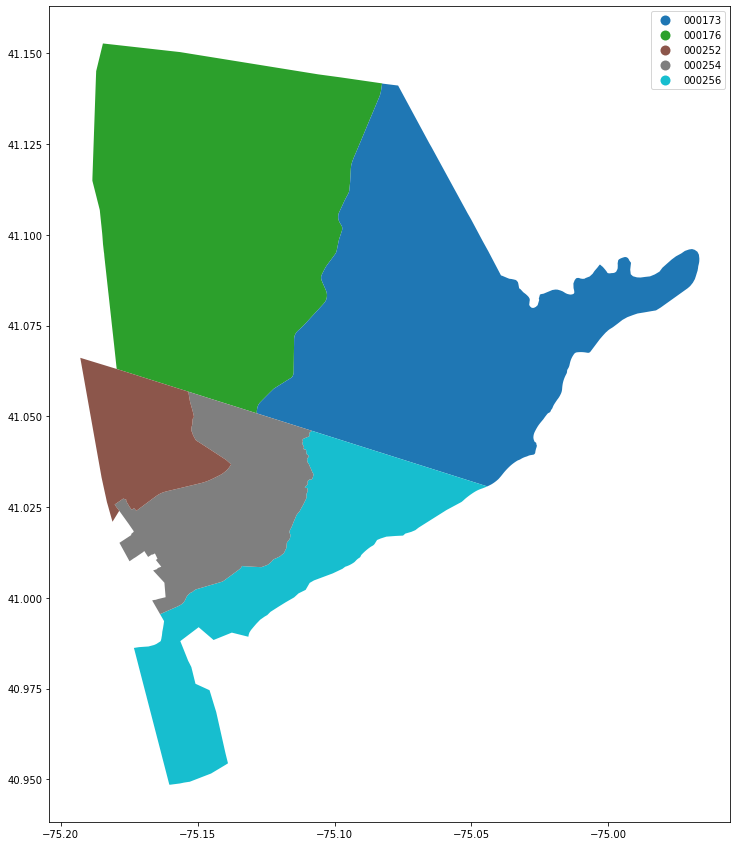

In [41]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("SMITHFIELD"))&(shapefiles_census["COUNTYFP"]=="089")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("SMITHFIELD"))&(vest_pa_16["COUNTYFP"]=="089")].plot(column="VTDST",legend=True,figsize=(15,15))

In [42]:
#print(shapefiles_census[(shapefiles_census["NAME"].str.contains("SMITHFIELD"))&(shapefiles_census["COUNTYFP"]=="089")])
#print(vest_pa_16[(vest_pa_16["NAME"].str.contains("SMITHFIELD"))&(vest_pa_16["COUNTYFP"]=="089")])

#### Montgomery (Hatfield)

<AxesSubplot:>

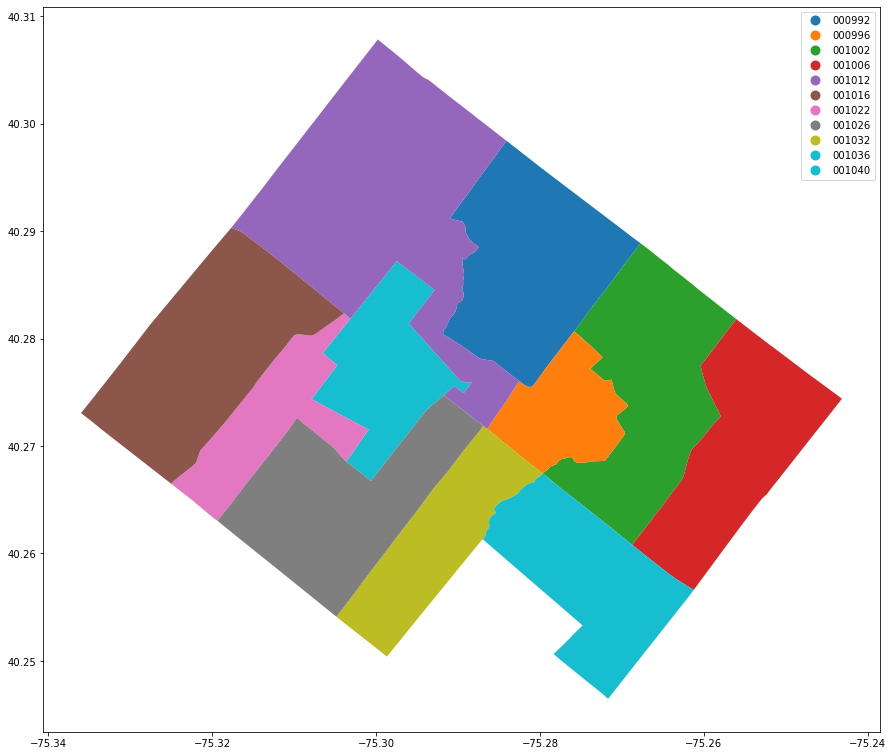

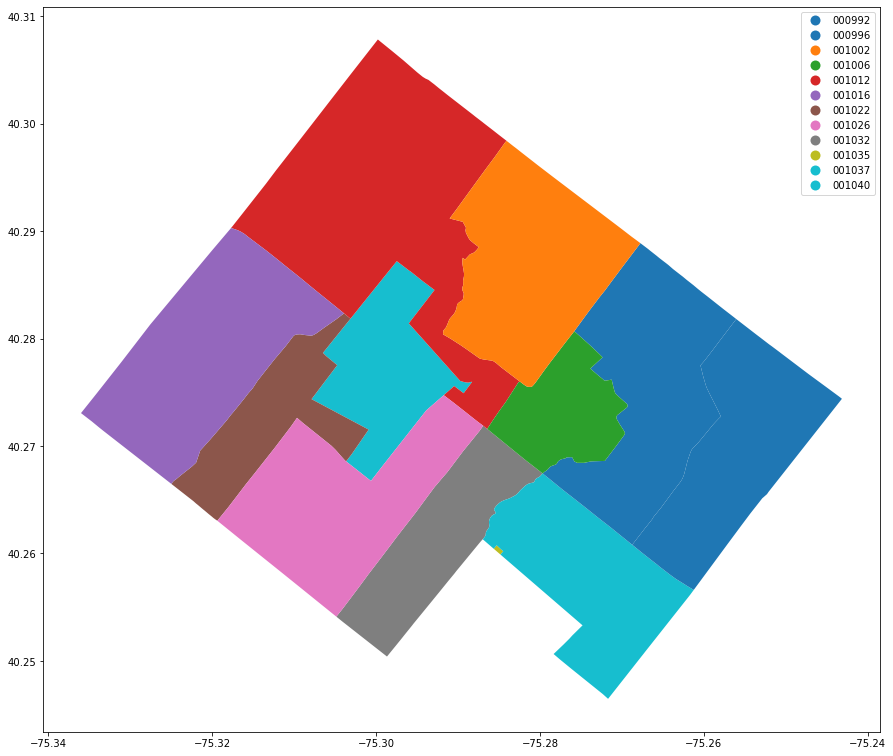

In [43]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("HATFIELD"))&(shapefiles_census["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("HATFIELD"))&(vest_pa_16["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))

<AxesSubplot:>

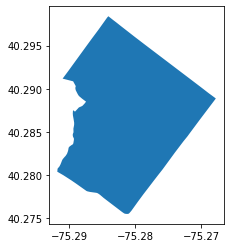

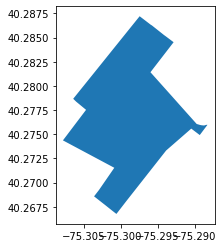

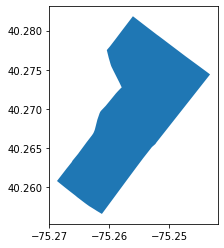

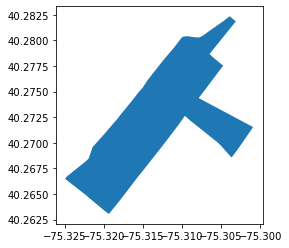

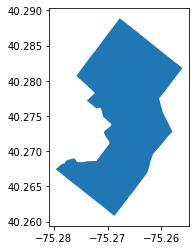

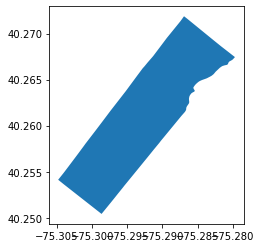

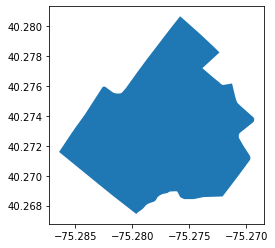

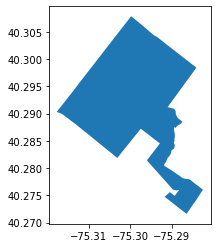

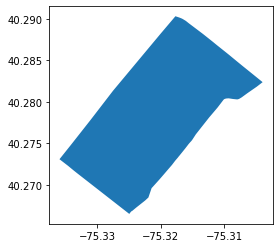

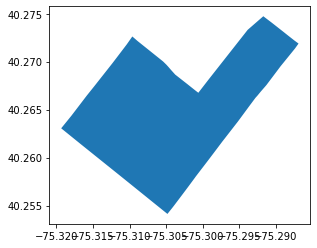

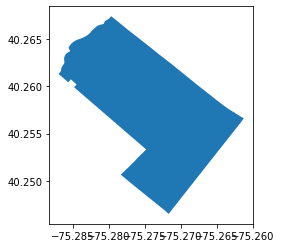

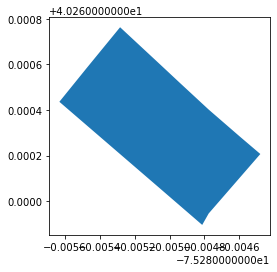

In [44]:
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001002")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001040")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="000992")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001022")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="000996")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001032")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001006")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001012")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001016")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001026")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001037")].plot()
vest_pa_16.loc[(vest_pa_16["COUNTYFP"]=="091") & (vest_pa_16["VTDST"]=="001035")].plot()



<AxesSubplot:>

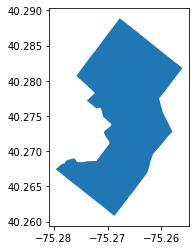

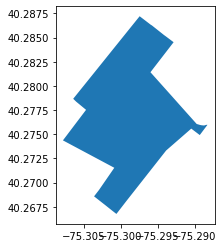

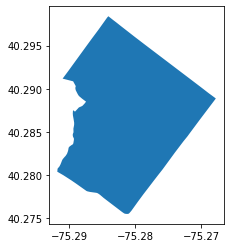

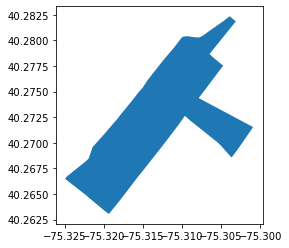

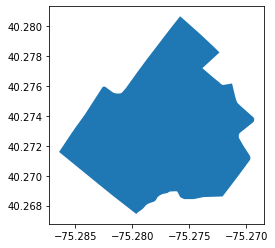

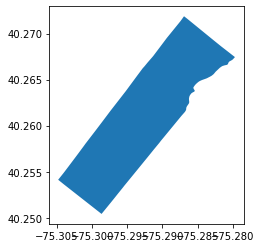

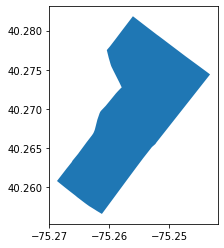

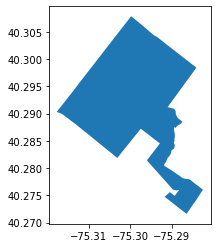

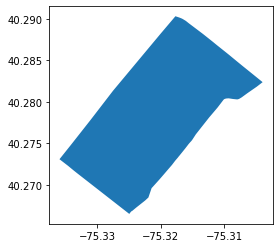

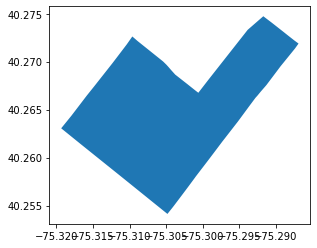

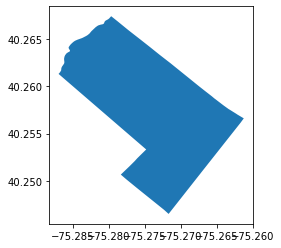

In [45]:
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001002")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001040")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="000992")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001022")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="000996")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001032")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001006")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001012")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001016")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001026")].plot()
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001036")].plot()

In [46]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("HATFIELD"))&(shapefiles_census["COUNTYFP"]=="091")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("HATFIELD"))&(vest_pa_16["COUNTYFP"]=="091")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001002"),"shp_join"] = "091000996"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001040"),"shp_join"] = "091001040"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="000992"),"shp_join"] = "091001002"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001022"),"shp_join"] = "091001022"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="000996"),"shp_join"] = "091001006"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001032"),"shp_join"] = "091001032"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001006"),"shp_join"] = "091000992"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001012"),"shp_join"] = "091001012"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001016"),"shp_join"] = "091001016"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001026"),"shp_join"] = "091001026"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="091") & (shapefiles_census["VTDST"]=="001036"),"shp_join"] = "091001037"


     COUNTYFP   VTDST                              NAME  \
5659      091  001002  HATFIELD DISTRICT 02 DISTRICT 01   
5660      091  001040                          HATFIELD   
5661      091  000992  HATFIELD DISTRICT 01 DISTRICT 01   
5662      091  001022  HATFIELD DISTRICT 04 DISTRICT 01   
5664      091  000996  HATFIELD DISTRICT 01 DISTRICT 02   
5665      091  001032  HATFIELD DISTRICT 05 DISTRICT 01   
5667      091  001006  HATFIELD DISTRICT 02 DISTRICT 02   
5670      091  001012  HATFIELD DISTRICT 03 DISTRICT 01   
5671      091  001016  HATFIELD DISTRICT 03 DISTRICT 02   
5672      091  001026  HATFIELD DISTRICT 04 DISTRICT 02   
5675      091  001036  HATFIELD DISTRICT 05 DIVISION 02   

                                               geometry  \
5659  POLYGON Z ((-75.27967 40.26745 0.00000, -75.27...   
5660  POLYGON Z ((-75.30738 40.27486 0.00000, -75.30...   
5661  POLYGON Z ((-75.29181 40.28048 0.00000, -75.29...   
5662  POLYGON Z ((-75.32486 40.26658 0.00000, -75.32...

<AxesSubplot:>

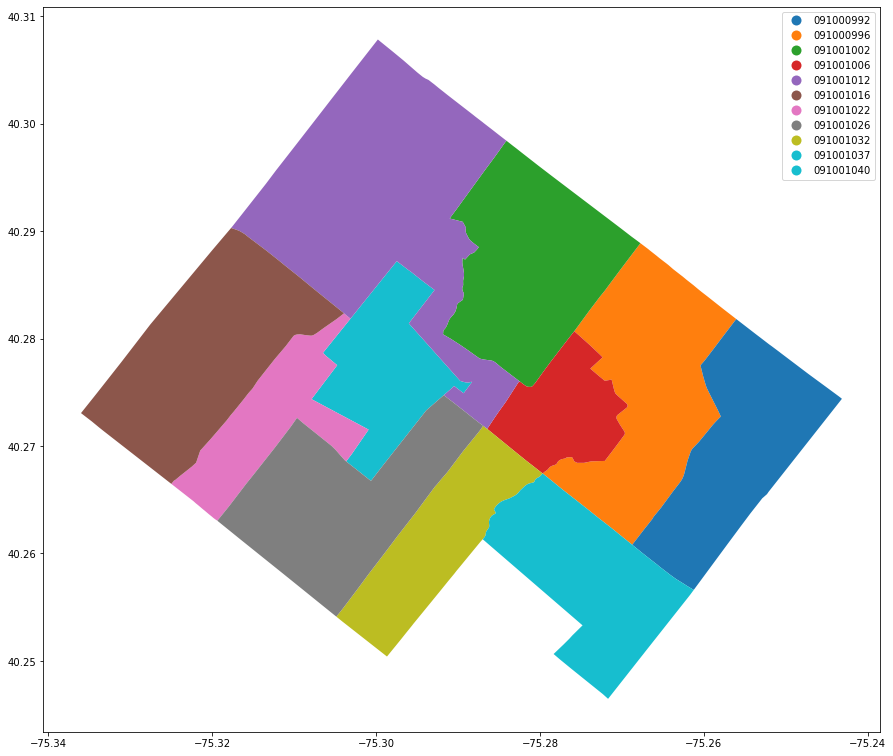

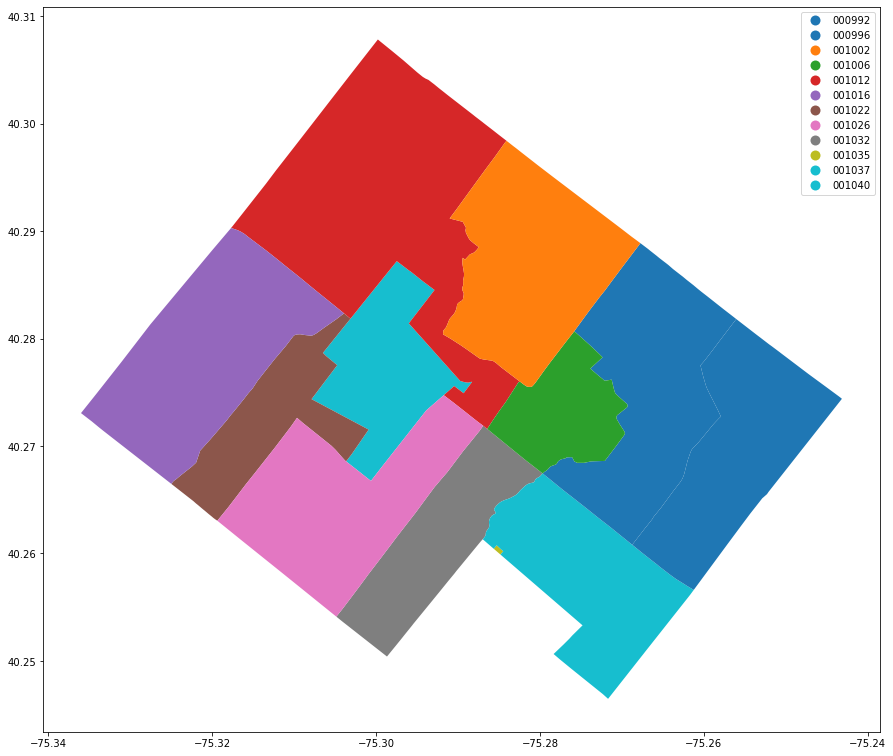

In [47]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("HATFIELD"))&(shapefiles_census["COUNTYFP"]=="091")].plot(column="shp_join",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("HATFIELD"))&(vest_pa_16["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))

#### Northampton (Bethlehem Twp)

KeyboardInterrupt: 

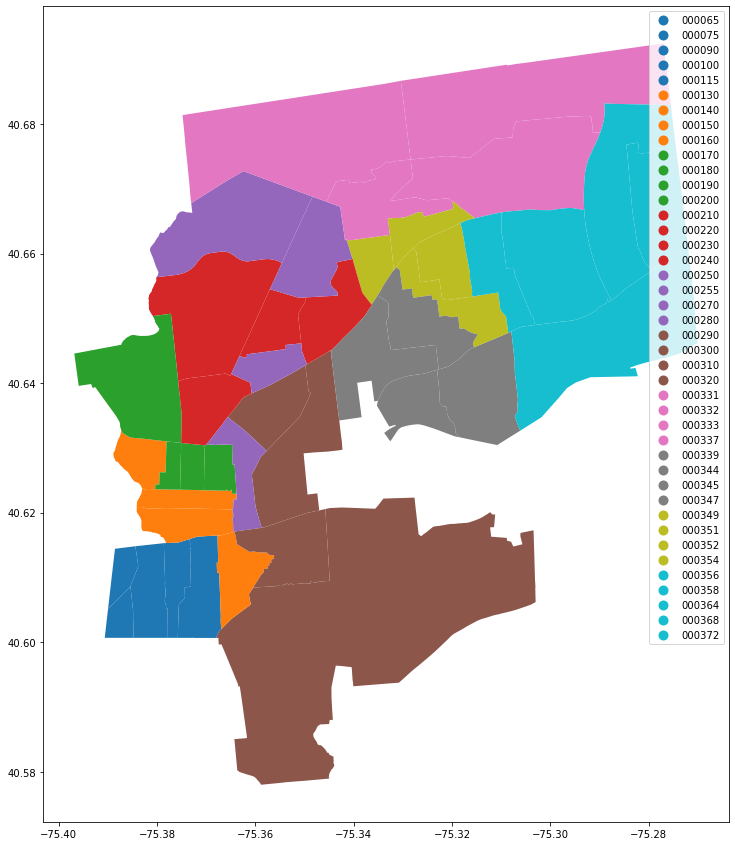

In [48]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("BETHLEHEM"))&(shapefiles_census["COUNTYFP"]=="095")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("BETHLEHEM"))&(vest_pa_16["COUNTYFP"]=="095")].plot(column="VTDST",legend=True,figsize=(15,15))

In [ ]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("BETHLEHEM"))&(shapefiles_census["COUNTYFP"]=="095")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("BETHLEHEM"))&(vest_pa_16["COUNTYFP"]=="095")])

#### Perry (Toboyne)

In [ ]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("TOBOYNE"))&(shapefiles_census["COUNTYFP"]=="099")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("TOBOYNE"))&(vest_pa_16["COUNTYFP"]=="099")].plot(column="VTDST",legend=True,figsize=(15,15))

In [ ]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("TOBOYNE"))&(shapefiles_census["COUNTYFP"]=="099")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("TOBOYNE"))&(vest_pa_16["COUNTYFP"]=="099")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="099") & (shapefiles_census["VTDST"]=="000280"),"shp_join"] = "099000290"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="099") & (shapefiles_census["VTDST"]=="000290"),"shp_join"] = "099000280"

#### Washington (New Eagle, Somerset)

In [ ]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("SOMERSET DISTRICT"))&(shapefiles_census["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("SOMERSET DISTRICT"))&(vest_pa_16["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))

In [ ]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("SOMERSET DISTRICT"))&(shapefiles_census["COUNTYFP"]=="125")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("SOMERSET DISTRICT"))&(vest_pa_16["COUNTYFP"]=="125")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="125") & (shapefiles_census["VTDST"]=="001620"),"shp_join"] = "125001630"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="125") & (shapefiles_census["VTDST"]=="001630"),"shp_join"] = "125001620"

In [ ]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("NEW EAGLE"))&(shapefiles_census["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("NEW EAGLE"))&(vest_pa_16["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))

In [ ]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("NEW EAGLE"))&(shapefiles_census["COUNTYFP"]=="125")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("NEW EAGLE"))&(vest_pa_16["COUNTYFP"]=="125")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="125") & (shapefiles_census["VTDST"]=="001230"),"shp_join"] = "125001240"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="125") & (shapefiles_census["VTDST"]=="001240"),"shp_join"] = "125001230"

#### York (Fairview)

In [ ]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("FAIRVIEW DISTRICT"))&(shapefiles_census["COUNTYFP"]=="133")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("FAIRVIEW DISTRICT"))&(vest_pa_16["COUNTYFP"]=="133")].plot(column="VTDST",legend=True,figsize=(15,15))

In [ ]:
print(shapefiles_census[(shapefiles_census["NAME"].str.contains("FAIRVIEW DISTRICT"))&(shapefiles_census["COUNTYFP"]=="133")])
print(vest_pa_16[(vest_pa_16["NAME"].str.contains("FAIRVIEW DISTRICT"))&(vest_pa_16["COUNTYFP"]=="133")])

shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="133") & (shapefiles_census["VTDST"]=="000220"),"shp_join"] = "133000235"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="133") & (shapefiles_census["VTDST"]=="000235"),"shp_join"] = "133000240"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="133") & (shapefiles_census["VTDST"]=="000240"),"shp_join"] = "133000245"
shapefiles_census.loc[(shapefiles_census["COUNTYFP"]=="133") & (shapefiles_census["VTDST"]=="000245"),"shp_join"] = "133000220"

### Step Not Completed: Other precinct re-alignment based on voter file / municipal files

In their documentation, VEST lists a number of precincts that were re-aligned using the voter file or other municipal files. Because we do not have access to the PA voter file and because they do not explain what municipal files to look at and specifically what adjustments to make, these adjustments were not made.

### Add a VTDST column to the election results (using what VEST has) to perform join

In [ ]:
#Grab the VTDST using the election result join to the shapefile
join_one["cty_VTDST"]=join_one['COUNTYFP_x']+join_one['VTDST']
vtdst_dict = join_one[['election_check_join',"cty_VTDST"]]

#Add a VTDST column to the election results for the join
pa_vtdst_dict = dict(zip(vtdst_dict['election_check_join'],vtdst_dict["cty_VTDST"]))
pivoted_2016["shp_join"] = pivoted_2016['election_check_join'].map(pa_vtdst_dict).fillna("No match")

### Modify some VTDST names to match the census

In [ ]:
def change_name(old_id, new_id):
    new_name = shapefiles_census.loc[shapefiles_census['shp_join']==new_id,"NAME"].values[0]
    old_name = old_id[3:]
    print("Updating elec. precinct",old_name, "to match the shp. precinct",new_name)
    pivoted_2016.loc[pivoted_2016["election_check_join"]==old_id,"shp_join"]=new_id

In [ ]:
change_name("071LANCASTER WARD 7-8","071000925")
change_name("047HORTON","047000110")
change_name("041LOWER ALLEN PRECINCT 1","041000340")
change_name("095BETHLEHEM WARD 03 DISTRICT 02","095000349")
change_name("095BETHLEHEM WARD 02 DISTRICT 01","095000339")
change_name("095BETHLEHEM WARD 03 DISTRICT 01","095000347")
change_name("095BETHLEHEM WARD 1-1","095000331")
change_name("095BETHLEHEM WARD 03 DISTRICT 04","095000354")
change_name("095BETHLEHEM WARD 1-2","095000332")
change_name("095BETHLEHEM WARD 03 DISTRICT 03","095000352")
change_name("095BETHLEHEM WARD 04 DISTRICT 02","095000364")
change_name("095BETHLEHEM WARD 04 DISTRICT 01","095000358")
change_name("095BETHLEHEM WARD 04 DISTRICT 03","095000368")
change_name("101PHILADELPHIA WARD 18 PRECINCT 01","101001799")
change_name("101PHILADELPHIA WARD 18 PRECINCT 09","101001819")
change_name("101PHILADELPHIA WARD 05 PRECINCT 10","101001068")
change_name("101PHILADELPHIA WARD 05 PRECINCT 16","101001069")
change_name("101PHILADELPHIA WARD 05 PRECINCT 17","101001080")
change_name("101PHILADELPHIA WARD 05 PRECINCT 21","101001081")
change_name("101PHILADELPHIA WARD 05 PRECINCT 25","101001087")
change_name("101PHILADELPHIA WARD 05 PRECINCT 26","101001088")
change_name("101PHILADELPHIA WARD 05 PRECINCT 27","101001089")

In [ ]:
pa_cong_districts = gp.read_file("./raw-from-source/pa_cong_2011_to_2018/pa_cong_2011_to_2018.shp")
pa_cong_districts = pa_cong_districts[["District_N","geometry"]]
#Check they have the same crs
print(pa_cong_districts.crs)
print(shapefiles_census.crs)

In [ ]:
def cd_splits(cd_list,shp_id,new_id_list):
    global shapefiles_census
    old_name = shapefiles_census.loc[shapefiles_census["cty_pct"]==shp_id,"NAME"].values[0]
    new_name_1 = pivoted_2016.loc[pivoted_2016["shp_join"]==new_id_list[0],"NAME"].values[0]
    new_name_2 = pivoted_2016.loc[pivoted_2016["shp_join"]==new_id_list[1],"NAME"].values[0]
    print("Prec:" ,old_name,"->",new_name_1,"and",new_name_2)
    full_shape = shapefiles_census.loc[shapefiles_census["cty_pct"]==shp_id]
    cd_1 = pa_cong_districts.loc[pa_cong_districts["District_N"]==cd_list[0]]
    cd_2 = pa_cong_districts.loc[pa_cong_districts["District_N"]==cd_list[1]]
    full_shape.plot()
    new_prec_1 = gp.overlay(full_shape, cd_1, how='intersection')
    new_prec_2 = gp.overlay(full_shape, cd_2, how='intersection')
    #print(new_prec_1.columns)
    #print(new_prec_2.columns)
    
    #Remove the precinct that was split
    shapefiles_census=shapefiles_census[shapefiles_census["cty_pct"]!=shp_id]
    shapefiles_census.reset_index(drop=True,inplace=True)
    
    #Create two new precincts
    new_prec_1 = new_prec_1[list(shapefiles_census.columns)]
    new_prec_1["shp_join"]=new_id_list[0]
    new_prec_1["cty_pct"]="new"
    new_prec_2 = new_prec_2[list(shapefiles_census.columns)]
    new_prec_2["cty_pct"]="new"
    new_prec_2["shp_join"]=new_id_list[1]
    shapefiles_census=shapefiles_census.append(new_prec_1)
    shapefiles_census=shapefiles_census.append(new_prec_2)
    shapefiles_census.reset_index(drop=True,inplace=True)
    
    
    

    


In [ ]:
cd_splits(["5","10"],"117000350SHIPPEN",["117000349","117000351"])
cd_splits(["13","7"],"091002488PLYMOUTH DISTRICT 02 DISTRICT 03",["091002492","091002488"])
cd_splits(["6","7"],"091002195PERKIOMEN DISTRICT 01",["091002194","091002196"])
cd_splits(["15","17"],"095000320BETHLEHEM WARD 17",["095000319","095000321"])
cd_splits(["10","11"],"097000560RIVERSIDE",["097000559","097000561"])
cd_splits(["2","13"],"091001430LOWER MERION WARD 02 WARD 02",["091001429","091001431"])
cd_splits(["7","13"],"091001085HORSHAM DISTRICT 02 DIVISION 02",["091001086","091001084"])
cd_splits(["13","8"],"091001036HATFIELD DISTRICT 05 DIVISION 02",["091001035","091001037"])
cd_splits(["4","11"],"043001155SUSQUEHANNA WARD 03",["043001154","043001156"])
cd_splits(["11","4"],"043001135SUSQUEHANNA WARD 01",["043001136","043001138"])
cd_splits(["6","16"],"011000530LAURELDALE DISTRICT 01",["011000529","011000531"])

In [ ]:
merged_source = pd.merge(shapefiles_census,pivoted_2016,on="shp_join",how="outer",indicator=True)

In [ ]:
print(merged_source["_merge"].value_counts())

left_only = merged_source[merged_source["_merge"]=="left_only"]
#left_only.to_csv("./election_shapes_check_only_shapes.csv")

right_only = merged_source[merged_source["_merge"]=="right_only"]
#right_only.to_csv("./election_shapes_check_only_election.csv")


Note: For the remaining ~40 unjoined precincts, we were not able to make any additional progress in matching them either because it was not clear where they belonged or they required shapefile splits that we were not able to make.

## Final Merge

In [ ]:
final_merge = pd.merge(merged_source[merged_source["_merge"]=="both"],vest_pa_16,how="outer",on="election_check_join",indicator="final_merge")
print(final_merge["final_merge"].value_counts())

In [ ]:
both = final_merge[final_merge["final_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_pa_16.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_pa_16.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

In [ ]:
print(source_geoms.columns)

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.iat[i,2]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")